## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import json 
import IPython

from binascii import a2b_base64
import urllib

from IPython.display import Image

from IPython.core.debugger import Pdb; 
!pip install pymssql
import pymssql



## Importing CSV data and latex data and merginge them, then perform pre processing to remove duplicate question

In [2]:
bio_data = pd.read_csv('data-bio.csv')
bio_data

,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex
0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...
1,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...
2,7/8 CBSE,Biology,Ecology,Environmental Issues,EL NINO Effect,61282,"<html><body><div><img src= ""data:img/jpg;base6...",Example,"Temperature inversions, heat islands, and dust..."
3,7/8 CBSE,Biology,Biology in Human Welfare,Human Health and Disease,Kwashiorkor,35703,NaN,Trial,Kwashiorkor disease is due to deficiency of :\...
4,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...
...,...,...,...,...,...,...,...,...,...
1923,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,64178,NaN,Example,Father of Angiology is-\n(A) William Harvey\n(...
1924,7/8 CBSE,Biology,Biology in Human Welfare,Human Health and Disease,Non- communicable Diseases,34837,NaN,Example,can cause cancer in humans.\n(A) Chlorides\n(B...
1925,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Gastrointestinal Hormones,133214,NaN,Example,Secretin is a gastrointestinal tract hormone t...
1926,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,Ex situ Conservation,122264,NaN,Example,Which one of the following is not used for ex ...


In [3]:
# checking how much data have image information present 
image_data = bio_data[pd.isnull(bio_data.imageHTML) == False]
print('questions with image are ',image_data.shape[0])
image_data.to_csv('questions_with_image.csv')

image_data[['QuestionId','imageHTML','Q_Latex']].to_csv('questions_with_image.csv')

questions with image are  80


### Taking all questions with non nan  imageHTML and checking if latex files are corretly converted to images 


Temperature inversions, heat islands, and dust domes are the result of
(A) EI nino
(B) Ozone depletion
(C) Urban pollution
(D) Acid rain


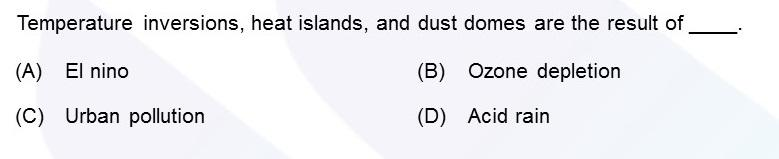

> /var/folders/sg/ln13845560z4fpbbpyl66hjw0000gn/T/ipykernel_14017/3494055309.py(2)<module>()
      1 # problems in running in colab
----> 2 for index, row in image_data.iterrows():
      3     image_html = row['imageHTML'];
      4     image_html=image_html.split('src= "')
      5     image_url = image_html[1].split('" >')

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
A nutritionally wild type organism, which does not require any additional growth
supplement is known as
(A) Prototroph
(B) Phenotype
(C) Holotype
(D) Auxotroph


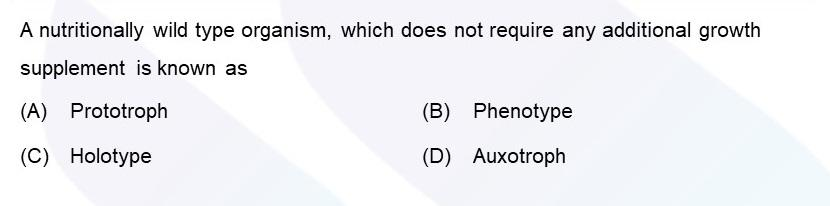

> /var/folders/sg/ln13845560z4fpbbpyl66hjw0000gn/T/ipykernel_14017/3494055309.py(2)<module>()
      1 # problems in running in colab
----> 2 for index, row in image_data.iterrows():
      3     image_html = row['imageHTML'];
      4     image_html=image_html.split('src= "')
      5     image_url = image_html[1].split('" >')



In [4]:
# problems in running in colab 
for index, row in image_data.iterrows():
    image_html = row['imageHTML'];
    image_html=image_html.split('src= "')
    image_url = image_html[1].split('" >')
    data = image_url[0]
    response = urllib.request.urlopen(data)
    with open('image.jpg', 'wb') as f:
        f.write(response.file.read())
    question_latex = row['Q_Latex'];
    print(question_latex)
    img = Image(filename='image.jpg') 
    display(img)    
    Pdb().set_trace()
    # type continue in text box to go to next image, quit() to exit the loop 
    
quit()
quit()
quit()



### Codes for pre processing and splitting data 

In [ ]:
def example_trial_split(data):

  example_data = data[data.UseAs == 'Example']
  print('number of example data are', example_data.shape[0])
  trial_data = data[data.UseAs == 'Trial']
  print('number of trial data are', trial_data.shape[0])

  trial_data.to_csv('trial_data_bio.csv')
  example_data.to_csv('example_data_bio.csv')

  return trial_data, example_data

In [ ]:
# extracting Q_latex column 


# Defining functions for preprocessing step to remove latex specific characters and punctuations

# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]


# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
latex_keywords=['begin','end','mathrm','Idots''idots','quad','a','b','c','d','i','ii','iii','iv','vii','longrightarrow',       
                'hline','rightarrow','column','text','array','begin','end','III','nm','none','one','frac'];

                
question_types=['true','false','assertion','asassertion','reason','correct','explanation','incorrect','questions','option','options'
               'statement','carefully','followed','following','incorrect','statements',
                 'assertion',
                 'statement',
                 'contains',
                 'select',
                 'reason',
                 'two',
                 'options',
                 'question',
                 'describes',
                 'answer',
                 'best',
                 'basis',
                 'correctexplanation',
                 'readthem',
                 'you',
                 'responses',
                 'answering',
                 'consist','(',')','_']


In [ ]:
# main pre processing step 
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')  # defining stopwords from english language 
param_stemmer = SnowballStemmer('english')#defining stemmer to convert words to their root form 

## This code removes the punctuation, latex keywords and garbage values, can be customized according to need 
def preProcess(Question_text):
    for question in Question_text:
            index = Question_text.index(question)
            Question_text[index] = Question_text[index].replace(',', '')         # Removes commas
            Question_text[index] = Question_text[index].replace('\\', '')        # Removes \
            Question_text[index] = Question_text[index].replace('\n', '')        # removed newline
            Question_text[index] = Question_text[index].replace('-', '')        # removed newline
            Question_text[index] = Question_text[index].replace('~', '')        # Removes \
            Question_text[index] = Question_text[index].replace('=', '')        # Removes \



            Question_text[index] = Question_text[index].casefold()               # Makes all letters lowercase
            Question_text[index] = re.sub('\W_',' ', Question_text[index])       # removes specials characters 
            Question_text[index] = re.sub("\d"," ", Question_text[index])       # removes numbers
            listOfTokens = word_tokenize(Question_text[index])
            twoLetterWord = twoLetters(listOfTokens)
            

            listOfTokens = removeWords(listOfTokens, latex_keywords)    #remove all the latex keywords from our data
            listOfTokens = removeWords(listOfTokens, question_types)     #words such as assertion,reason,true,false etc
            listOfTokens = removeWords(listOfTokens, stopwords)
            listOfTokens = removeWords(listOfTokens, twoLetterWord)
            


            Question_text[index]   = " ".join(listOfTokens)
            Question_text[index] = unidecode(Question_text[index])
      
    return Question_text






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [ ]:
def get_top_features_cluster_ind(tf_idf_array, prediction, n_feats,lab):
    labels = np.unique(prediction)
    dfs = []
    label = lab;
    id_temp = np.where(prediction==label) # indices for each cluster
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    return df
  

In [ ]:
def preProcessDeepLearning(example_data , trial_data , label):
  example_data['split']= 'train'
  test_data = trial_data
  test_data['split'] = 'test'
  merged_test_train_data = example_data.append(test_data)
  merged_test_train_data =merged_test_train_data[['Q_Latex',label,'split']] # select the column you want as label
  merged_test_train_data.rename(columns = {'Q_Latex':'sentence',	label:'label'}, inplace = True)
  return merged_test_train_data;





In [ ]:
# Define a function to compute the max length of sequence
def max_length(sequences):
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length

In [ ]:
def make_pred(model,test_x,corpus):
  tokenizer = Tokenizer(oov_token=oov_tok)
  tokenizer.fit_on_texts(train_x)
  training_sequences = tokenizer.texts_to_sequences(train_x)
  test_sequences = tokenizer.texts_to_sequences(test_x)
  max_len = max_length(training_sequences)


  Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
  Xtrain = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)


  predictions= model.predict(Xtest,verbose= 0 )
  first_predictions= np.argmax(predictions,axis= 1).tolist()
  test_corpus = corpus[corpus['split'] == 'test']
  correct_code = test_corpus['label'].tolist()
  correct_labels = [chapter_mapping[chapter_mapping['label_code']== pred_label]['label'].tolist()[0]
                            for pred_label in correct_code ]
  first_predicted_labels = [chapter_mapping[chapter_mapping['label_code']== pred_label]['label'].tolist()[0]
                            for pred_label in first_predictions ]
  test_corpus['First_prediction'] = first_predicted_labels
  test_corpus['CorrectLabel'] = correct_labels
  test_corpus[test_corpus['First_prediction'] == test_corpus['CorrectLabel']]
  return test_corpus;


In [ ]:
def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

In [ ]:
def train_test_split(corpus):
  # Separate the sentences and the labels
  # Separate the sentences and the labels for training and testing

  train_x = list(corpus[corpus.split=='train'].sentence)
  train_y = np.array(corpus[corpus.split=='train'].label)

  test_x = list(corpus[corpus.split=='test'].sentence)
  test_y = np.array(corpus[corpus.split=='test'].label)
  print('length of test data is - ', len(test_x))
  print('length of train data is - ', len(train_x))
  return train_x,train_y, test_x,test_y


In [ ]:
def accuracyTopThreeKSCText():

    pred_seq_wise = []
    for i in range(0,len(Xtest)-1):
      ques_text = test_x[i:i +1]
      test_ques = tokenizer_total.texts_to_matrix(ques_text, mode='freq')

      subject_pred= model_subjcet_total.predict(test_ques)
      subject_pred= np.argmax(subject_pred,axis= 1).tolist()
      subject_pred=subject_pred[0]
      pred_subject_label = subject_mapping[subject_mapping['label_code'] == subject_pred].label.tolist()[0]
      if(pred_subject_label != trial_data.SubjectName.tolist()[i]):
        pred_seq_wise.append(0) ;

      else :
        if(pred_subject_label == 'Biology'):
          test_ques = tokenizer_bio.texts_to_matrix(ques_text, mode='freq')
          chapter_pred= model_chapter_bio.predict(test_ques)
          ksc_model = model_KSC_bio
          pred_prob = chapter_mapping_bio
          ksc_mapping = KSC_mapping_bio
          pred_prob['Probability']=chapter_pred[0]
          valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
          pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

        elif(pred_subject_label == 'Chemistry'): 
          test_ques = tokenizer_chm.texts_to_matrix(ques_text, mode='freq')
          chapter_pred= model_chapter_chm.predict(test_ques)
          ksc_model = model_KSC_chm
          pred_prob = chapter_mapping_chm
          ksc_mapping = KSC_mapping_chm
          pred_prob['Probability']=chapter_pred[0]
          valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
          pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

        elif(pred_subject_label == 'Physics'):
          test_ques = tokenizer_phy.texts_to_matrix(ques_text, mode='freq')
          chapter_pred= model_chapter_phy.predict(test_ques)
          pred_prob = chapter_mapping_phy
          ksc_model = model_KSC_phy
          ksc_mapping = KSC_mapping_phy
          pred_prob['Probability']=chapter_pred[0]
          valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
          pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

        elif(pred_subject_label == 'Maths'):
          test_ques = tokenizer_math.texts_to_matrix(ques_text, mode='freq')
          chapter_pred= model_chapter_math.predict(test_ques)
          pred_prob = chapter_mapping_math
          ksc_model = model_KSC_math
          ksc_mapping = KSC_mapping_math
          pred_prob['Probability']=chapter_pred[0]
          valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
          pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

        if(pred_chapter_label != trial_data.ChapterName.tolist()[i]):
            pred_seq_wise.append(0) ;

        else: 
          KSC_pred = ksc_model.predict(test_ques)
          pred_prob = ksc_mapping
          pred_prob['Probability']=KSC_pred[0]
          valid_KSC = trial_data[trial_data['ChapterName']==pred_chapter_label ].KSCText.unique()
          try:
            correct_KSC = trial_data.KSCText.tolist()[i]
            correct_KSC_ind=total_KSC_list.index(correct_KSC)
            pred_KSC_label_first = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[0]
          
            pred_KSC_label_second = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[1]
            pred_KSC_label_third = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[2]
      
            
            if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC or pred_KSC_label_third == correct_KSC):
              result = 1;
              pred_seq_wise.append(1) ;
              
                
            else :
              result = 0 ;
              pred_seq_wise.append(0) ;
            
          except :
            try:
              if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC):
                result = 1;
                pred_seq_wise.append(1) ;
              else :
                result = 0 ;
                pred_seq_wise.append(0) ;
                
            except :
                if(pred_KSC_label_first == correct_KSC):
                  result = 1;
                  pred_seq_wise.append(1) ;
                else :
                  result = 0 ;
                  pred_seq_wise.append(0) ;


          try: 
            if(pred_KSC_label_first != correct_KSC and pred_KSC_label_second == correct_KSC):  # If this happens then the first label 
                  first_ksc_index =  total_KSC_list.index(pred_KSC_label_first)                 # can be in a cluster with second 
                  KSC_sim_array[first_ksc_index,correct_KSC_ind] =  KSC_sim_array[first_ksc_index,correct_KSC_ind] + 1
                  KSC_sim_array[correct_KSC_ind,first_ksc_index] =  KSC_sim_array[correct_KSC_ind,first_ksc_index] + 1
          except:
            continue
    return pred_seq_wise
        

          


In [ ]:
def accuracyTopThreeKSCClsuter(test_with_cluster):
  pred_seq_wise = []

  for i in range(0, len(Xtest)-1):
    ques_text = test_x[i:i +1]
    test_ques = tokenizer_total.texts_to_matrix(ques_text, mode='freq')

    subject_pred= model_subjcet_total.predict(test_ques)
    subject_pred= np.argmax(subject_pred,axis= 1).tolist()
    subject_pred=subject_pred[0]
    pred_subject_label = subject_mapping[subject_mapping['label_code'] == subject_pred].label.tolist()[0]
    if(pred_subject_label != trial_data.SubjectName.tolist()[i]):
      pred_seq_wise.append(0) ;

    else :
      if(pred_subject_label == 'Biology'):
        test_ques = tokenizer_bio.texts_to_matrix(ques_text, mode='freq')
        chapter_pred= model_chapter_bio.predict(test_ques)
        ksc_model = model_KSC_bio
        pred_prob = chapter_mapping_bio
        ksc_mapping = KSC_mapping_bio
        pred_prob['Probability']=chapter_pred[0]
        valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
        pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

      elif(pred_subject_label == 'Chemistry'): 
        test_ques = tokenizer_chm.texts_to_matrix(ques_text, mode='freq')
        chapter_pred= model_chapter_chm.predict(test_ques)
        ksc_model = model_KSC_chm
        pred_prob = chapter_mapping_chm
        ksc_mapping = KSC_mapping_chm
        pred_prob['Probability']=chapter_pred[0]
        valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
        pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

      elif(pred_subject_label == 'Physics'):
        test_ques = tokenizer_phy.texts_to_matrix(ques_text, mode='freq')
        chapter_pred= model_chapter_phy.predict(test_ques)
        pred_prob = chapter_mapping_phy
        ksc_model = model_KSC_phy
        ksc_mapping = KSC_mapping_phy
        pred_prob['Probability']=chapter_pred[0]
        valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
        pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

      elif(pred_subject_label == 'Maths'):
        test_ques = tokenizer_math.texts_to_matrix(ques_text, mode='freq')
        chapter_pred= model_chapter_math.predict(test_ques)
        pred_prob = chapter_mapping_math
        ksc_model = model_KSC_math
        ksc_mapping = KSC_mapping_math
        pred_prob['Probability']=chapter_pred[0]
        valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
        pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

      if(pred_chapter_label != trial_data.ChapterName.tolist()[i]):
          pred_seq_wise.append(0) ;

      else: 
        KSC_pred = ksc_model.predict(test_ques)
        pred_prob = ksc_mapping
        pred_prob['Probability']=KSC_pred[0]
        valid_KSC = trial_data[trial_data['ChapterName']==pred_chapter_label ].KSCText.unique()
        try:
          correct_KSC = trial_data.KSCText.tolist()[i]
          correct_KSC_cluster = test_with_cluster[test_with_cluster['KSCText']== correct_KSC].KSCClusterName.tolist()[0];


          pred_KSC_label_first = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[0];
          pred_KSC_cluster_first=test_with_cluster[test_with_cluster['KSCText']==pred_KSC_label_first].KSCClusterName.tolist()[0];

          pred_KSC_label_second=[]
          pred_KSC_cluster_second=[]
          pred_KSC_label_second = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[1];
          pred_KSC_cluster_second=test_with_cluster[test_with_cluster['KSCText']==pred_KSC_label_second].KSCClusterName.tolist()[0];

          pred_KSC_label_third=[]
          pred_KSC_cluster_third=[]
          pred_KSC_label_third = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[2];
          pred_KSC_cluster_third=test_with_cluster[test_with_cluster['KSCText']==pred_KSC_label_third].KSCClusterName.tolist()[0];

    
          
          if(pred_KSC_cluster_first == correct_KSC_cluster or pred_KSC_cluster_second == correct_KSC_cluster or pred_KSC_cluster_third == correct_KSC_cluster):
            result = 1;
            pred_seq_wise.append(1) ;
          else :
            result = 0 ;
            pred_seq_wise.append(0) ;
        except :
          try:
            if(pred_KSC_cluster_first == correct_KSC_cluster or pred_KSC_cluster_second == correct_KSC_cluster):
              result = 1;
              pred_seq_wise.append(1) ;
            else :
              result = 0 ;
              pred_seq_wise.append(0) ;
              
          except :
              if(pred_KSC_cluster_first == correct_KSC_cluster):
                result = 1;
                pred_seq_wise.append(1) ;
              else :
                result = 0 ;
                pred_seq_wise.append(0) ;
  return pred_seq_wise

## Models

In [ ]:
def simple_NN_model(no_label = 10, max_len = 100 ):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense( units=100, activation='relu', input_shape=(max_len,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=no_label, activation='softmax')
    ])
    
  
    return model

## Creating test and train data for cluster analysis 

In [ ]:
data_bio = pd.read_csv('data-bio.csv').reset_index()
trial_data_bio, example_data_bio = example_trial_split(data_bio)

number of example data are 1517
number of trial data are 411


In [ ]:
# exploring the example_data 
print('Number of topics covered by example data',(example_data_bio['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data_bio['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data_bio['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data_bio['Q_Latex'])) )

Number of topics covered by example data 8
Number of Chapters covered by example data 27
Number of KSC covered by example data 259
Questions lacking latex data  0


## Analysing data by topic, chapter and KSC text 


### Maximum questions are of Human Physiology followed by Genetics and Evolution

In [ ]:
### print('Columns in example data are ',example_data.columns)
grouped_by_chapter = example_data_bio.groupby('ChapterName').count()
grouped_by_chapter=grouped_by_chapter.sort_values(by = 'index',ascending=False)
grouped_by_chapter=grouped_by_chapter[grouped_by_chapter['index']>20]
grouped_by_chapter

,index,CourseName,SubjectName,TopicName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex
ChapterName,,,,,,,,,
Principles of Inheritance and Variation,287,287,287,287,287,287,12,287,287
Chemical Coordination and Integration,227,227,227,227,227,227,8,227,227
Biodiversity and Conservation,160,160,160,160,160,160,5,160,160
Human Reproduction,124,124,124,124,124,124,2,124,124
Neural Control and Coordination,84,84,84,84,84,84,2,84,84
Human Health and Disease,79,79,79,79,79,79,2,79,79
Molecular Basis of Inheritance,66,66,66,66,66,66,5,66,66
Cell Cycle and Cell Division,64,64,64,64,64,64,7,64,64
Microbes in Human Welfare,58,58,58,58,58,58,2,58,58


### We take only chapters which have > 20 questions avaialbe. Number of such chapters are 15

In [ ]:
abundant_chapters= grouped_by_chapter.index.tolist()
example_data_filtered_bio= example_data_bio[example_data_bio['ChapterName'].isin(abundant_chapters)]
trial_data_filtered_bio= trial_data_bio[trial_data_bio['ChapterName'].isin(abundant_chapters)]
example_data_filtered_bio.to_csv('example_data_filtered_bio.csv')
trial_data_filtered_bio.to_csv('trial_data_filtered_bio.csv')
print('Length of filtered example data is ',len(example_data_filtered_bio))
print('Length of filtered trial data is ',len(trial_data_filtered_bio))



Length of filtered example data is  1376
Length of filtered trial data is  375


### Questions belonging to Bacteria: Role in Agriculture and Industry KSC cluster has maximum number of questions 

In [ ]:
grouped_ksc_text = example_data_bio.groupby('KSCText').count()
grouped_ksc_text.sort_values(by = 'index',ascending=False)
kcs_abundant = grouped_ksc_text[grouped_ksc_text['index']> 5].index #  Prints KSC text which occur 
print('KSC which have more than 5 questions- ',len(kcs_abundant))                    #> 5 times in our dataet 

KSC which have more than 5 questions-  85


## K-means cluster anslysis 

In [ ]:
#Choose which dataset to use as training 
example_data = example_data_filtered_bio; 
trial_data = trial_data_filtered_bio;


num_clusters = example_data['ChapterName'].unique().shape[0];  # deine num of clusters to be formed with data, this can be set as number of chapters or KSC as desired 
no_example_data = len(example_data);
no_trial_data = len(trial_data);

merged_test_train_data = example_data.append(trial_data)
merged_test_train_data

,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex
0,0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...
1,1,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...
4,4,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...
5,5,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and their Roles - 1,150425,NaN,Example,"Which gland prepare you for flight, fear and f..."
7,7,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,In situ (on site) Conservation,41144,NaN,Example,Biosphere reserves differ from national parks ...
...,...,...,...,...,...,...,...,...,...,...
1885,1885,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,Hot spots,60941,NaN,Trial,What are the total number of hot spots present...
1888,1888,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,64465,"<html><body><div><img src= ""data:img/jpg;base6...",Trial,Largest heart is of\n(A) Giraffe\n(B) Elephant...
1889,1889,7/8 CBSE,Biology,Human Physiology,Breathing and Exchange of Gases,Transportation of Carbon Dioxide-1,36389,NaN,Trial,Toxic effect of carbon monoxide is due to its ...
1892,1892,7/8 CBSE,Biology,Cell Structure and Function,Cell Cycle and Cell Division,Bipolar Mitotic Spindle,139746,NaN,Trial,During the metaphase stage of mitosis spindle ...


## importing libraries for K means


In [ ]:
# Corpus Processing
! pip install unidecode
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics      import silhouette_samples, silhouette_score
from wordcloud            import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

In [ ]:
merged_test_train_data

,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex
0,0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...
1,1,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...
4,4,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...
5,5,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and their Roles - 1,150425,NaN,Example,"Which gland prepare you for flight, fear and f..."
7,7,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,In situ (on site) Conservation,41144,NaN,Example,Biosphere reserves differ from national parks ...
...,...,...,...,...,...,...,...,...,...,...
1885,1885,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,Hot spots,60941,NaN,Trial,What are the total number of hot spots present...
1888,1888,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,64465,"<html><body><div><img src= ""data:img/jpg;base6...",Trial,Largest heart is of\n(A) Giraffe\n(B) Elephant...
1889,1889,7/8 CBSE,Biology,Human Physiology,Breathing and Exchange of Gases,Transportation of Carbon Dioxide-1,36389,NaN,Trial,Toxic effect of carbon monoxide is due to its ...
1892,1892,7/8 CBSE,Biology,Cell Structure and Function,Cell Cycle and Cell Division,Bipolar Mitotic Spindle,139746,NaN,Trial,During the metaphase stage of mitosis spindle ...


In [ ]:
# main pre processing step 
Question_text = merged_test_train_data['Q_Latex'].tolist()
Question_text= preProcess(Question_text)
print('Text after pre processing', Question_text)

Text after pre processing ['removal organ least effect adult human spleen liver pancreas pituitary', 'ear hear sound waves frequency cycles/sec cycles/sec cycles/sec cycles/sec', 'first heart transplant performed william harvey watson christian bernard khorana', 'gland prepare flight fear fight adverse condition parathyroid thyroid adrenals pituitary', 'biosphere reserves differ national parks wild life sanctuaries absence human entry people integral part system plants paid attention animals living organisms brought places preservation prosperity', 'central pit retina visual acuity greatest macula lutea fovea blind spot lens', 'mutation visible successive generations called deletion dominant mutation recessive mutation segregation', 'genes linked shall genotype progeny crossbetween ab/ab ab/ab aabb aabb aabb aabb', 'mammalian follicle first described leeuwenhoek r.d graaf spallangi von baer', 'diagram shows features used classifying golden eaglebegin tabular |l|l|l| class genus class s

## Performing K means 

### Following is the example of the types of question belonging to the same KSC, we can see some similarity in keywords so we can hope to get thses grouped during cluster analysis 

In [ ]:
example_data[example_data['KSCText'] == 'types of eggs - based on distribution of yolk'].Q_Latex.tolist()

['Isolecithal eggs are found in :-\n(A) Birds\n(B) Frogs\n(C) Insects\n(D) Humans',
 'Butterflies, moth \\&honey bees \\& beetle lay eggs of which type\n(A) Microlecithal\n(B) Mesolecithal\n(C) Telolecithal\n(D) Centrolecithal',
 'Which of the following is correct match\n(A) Centrolecithal egg - insect\n(B) Megalecithal egg - eutherian mammals\n(C) Microlecithal egg - reptiles\n(D) Alecithal egg - birds',
 'Types of cleavage in centrolecithal eggs\n(A) Spiral\n(B) Superficial\n(C) Discoidal\n(D) Unequal holoblastic',
 'In telolecithal egg the yolk is found:\n(A) All over the egg\n(B) On one side\n(C) Both the sides\n(D) Centre.',
 'Egg with peripheral cytoplasm around the yolk is:\n(A) Isolecithal\n(B) Microlecithal\n(C) Telolecithal\n(D) Centrolecithal',
 'The eggs of birds is called :-\n(A) Polylecithal\n(B) Megalecithal\n(C) Macrolecithal\n(D) All of the above']

### Here we apply TF-IDF vectorization in our data which gives us the most important words present in our document 


### Referecne - https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Question_text)   # fitting our questions document to vectorizer 
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

vectorized_question_data  = tf_idf

#print("{} rows".format(final_df.shape[0]))
vectorized_question_data.T.nlargest(5, 0)   # getting top 5 words with most importance 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750
removal,0.395197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
least,0.375811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
adult,0.344756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
organ,0.315324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
effect,0.307271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171851,0.0,0.0


### We have converted the questions data into a vectorized form where each word has features which is its relative importance in each question. We will use this data in our K means algorithm.


### Here we run our K means algorithm - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
## Running K means aglorithm 

k = num_clusters  # defining the number of clusters which we want, for now it is the number of chapters we have ie 27

kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'    # automatically selects clusters 
                               , n_init = 10           # number of times to run K means
                               , random_state = 1
                               , algorithm = 'full')

In [ ]:
vectorized_example_data = vectorized_question_data[0:no_example_data];
vectorized_trial_data = vectorized_question_data[no_example_data:];
kmeans_result = kmeans.fit(vectorized_example_data)    # pass data in form n_samples * n_features 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


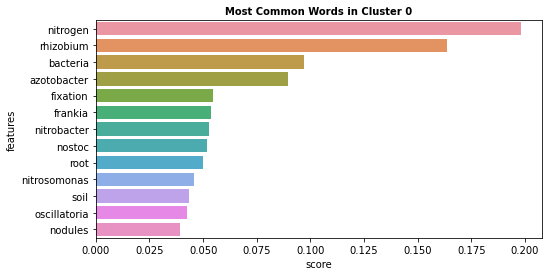

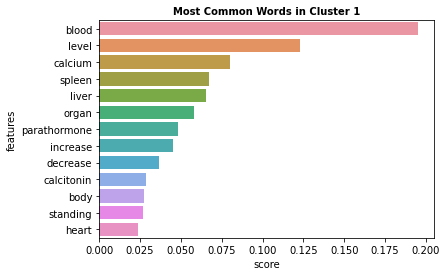

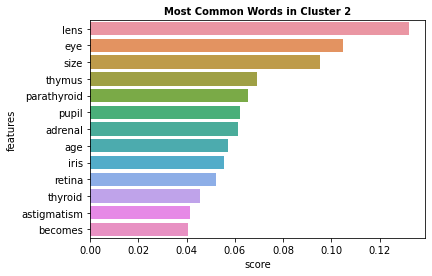

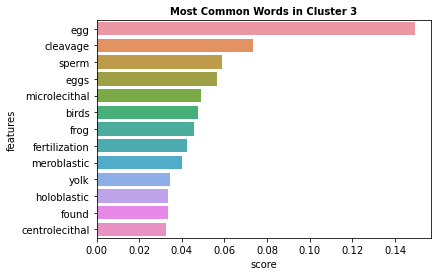

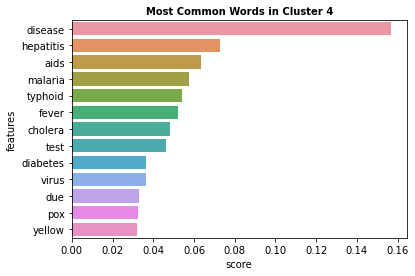

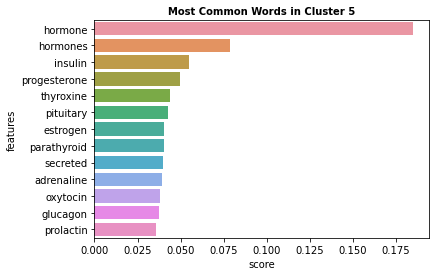

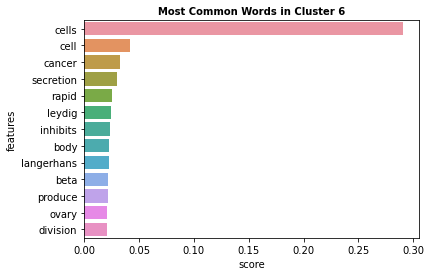

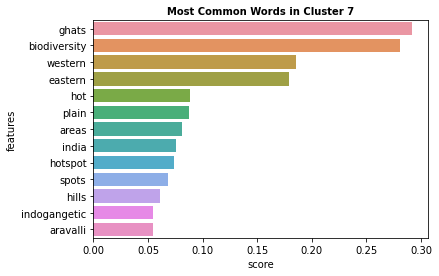

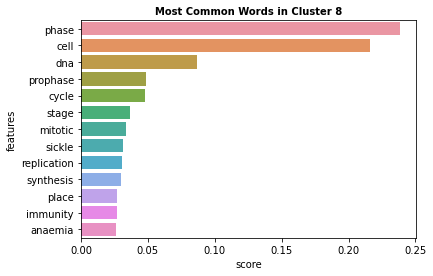

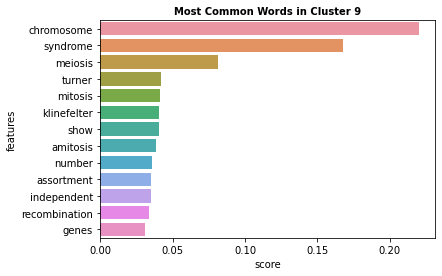

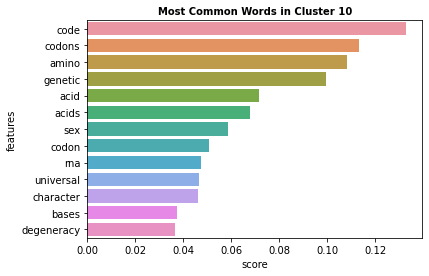

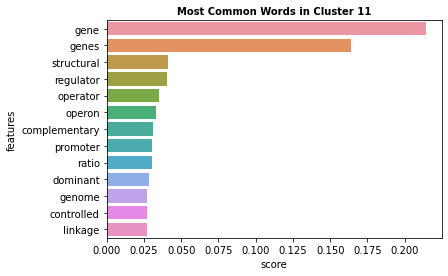

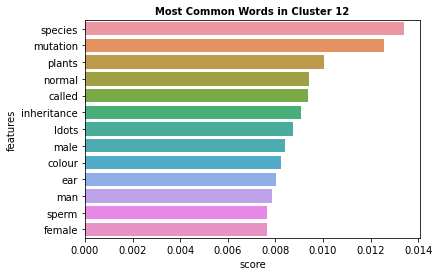

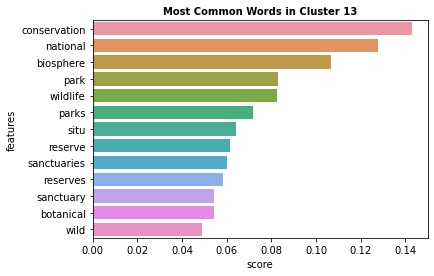

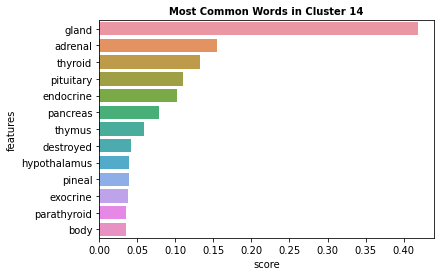

In [ ]:
predicted_cluster_labels = kmeans_result.predict(vectorized_question_data)
n_feats = 20
dfs = get_top_features_cluster(vectorized_question_data.to_numpy(), predicted_cluster_labels, n_feats)
plotWords(dfs, 13)

### Snippet to get top features of particular cluster

In [ ]:
get_top_features_cluster_ind(vectorized_question_data.to_numpy(), predicted_cluster_labels, n_feats,3).features.tolist()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['egg',
 'cleavage',
 'sperm',
 'eggs',
 'microlecithal',
 'birds',
 'frog',
 'fertilization',
 'meroblastic',
 'yolk',
 'holoblastic',
 'found',
 'centrolecithal',
 'telolecithal',
 'reptiles',
 'fish',
 'alecithal',
 'mesolecithal',
 'isolecithal',
 'zygote']

### We now assign labels to our original data and see how it classifies, We can see that most clusters have dominantly 1 chapter present. We label the cluster based on chapter occuring with max frequency 

In [ ]:
labels = kmeans.labels_ 
example_data['label'] = labels
example_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex,label
0,0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...,1
1,1,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...,12
4,4,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...,12
5,5,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and their Roles - 1,150425,NaN,Example,"Which gland prepare you for flight, fear and f...",14
7,7,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,In situ (on site) Conservation,41144,NaN,Example,Biosphere reserves differ from national parks ...,13


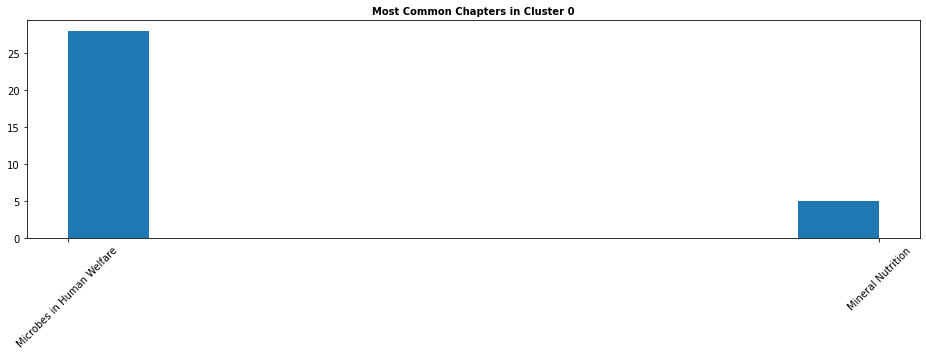

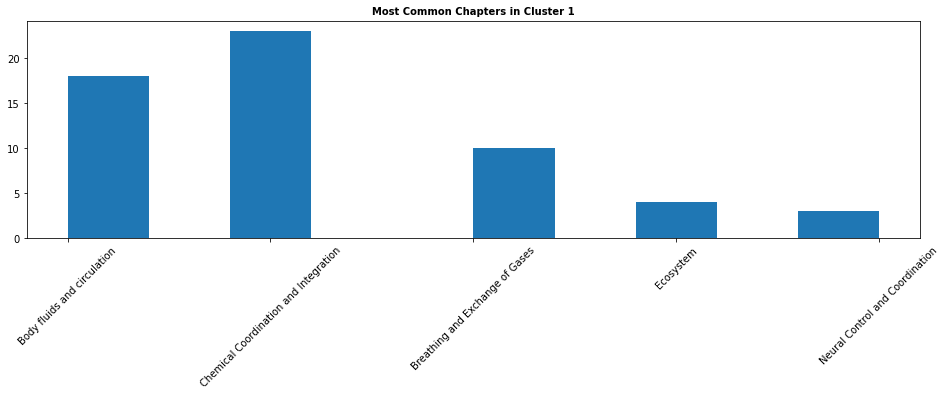

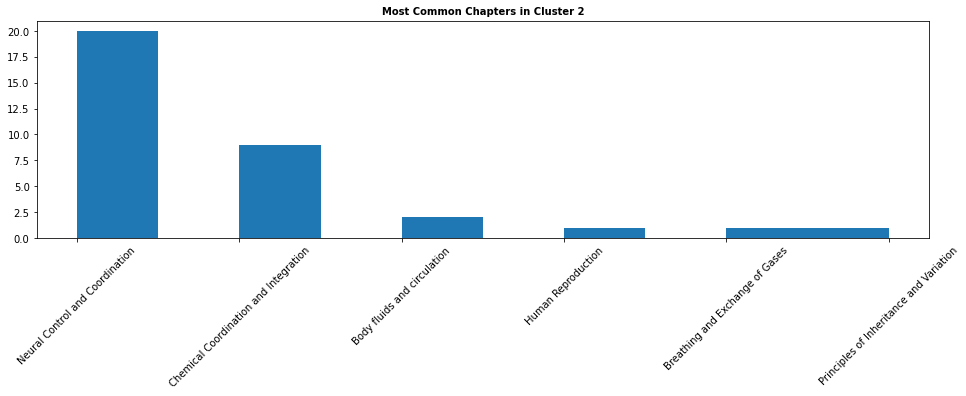

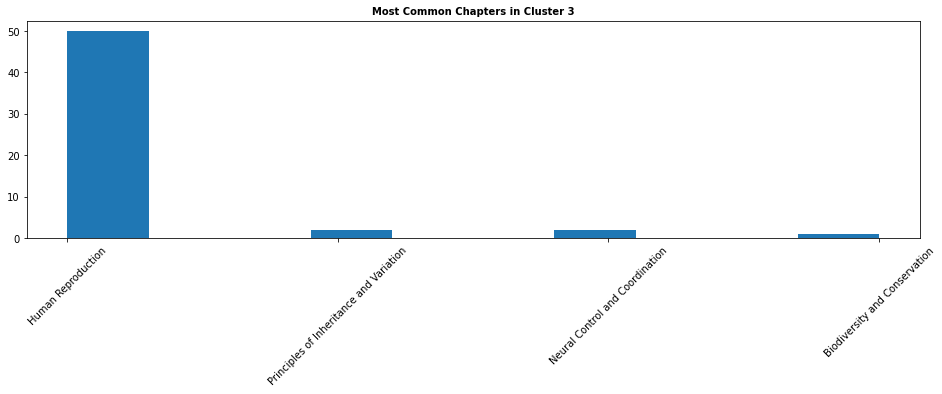

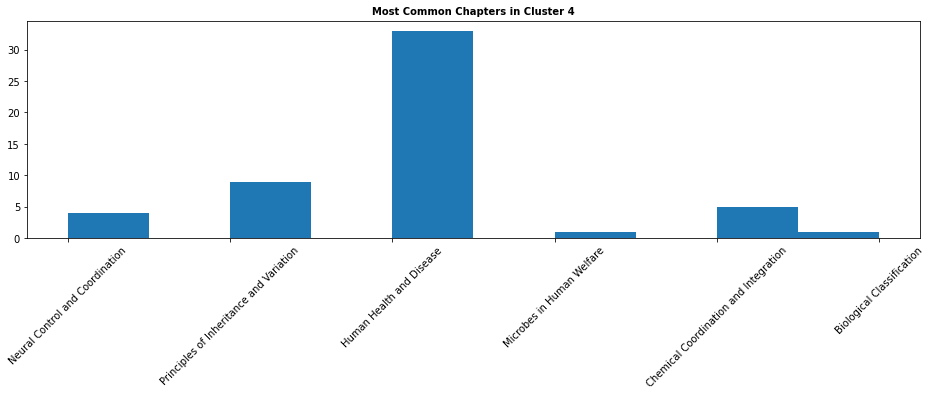

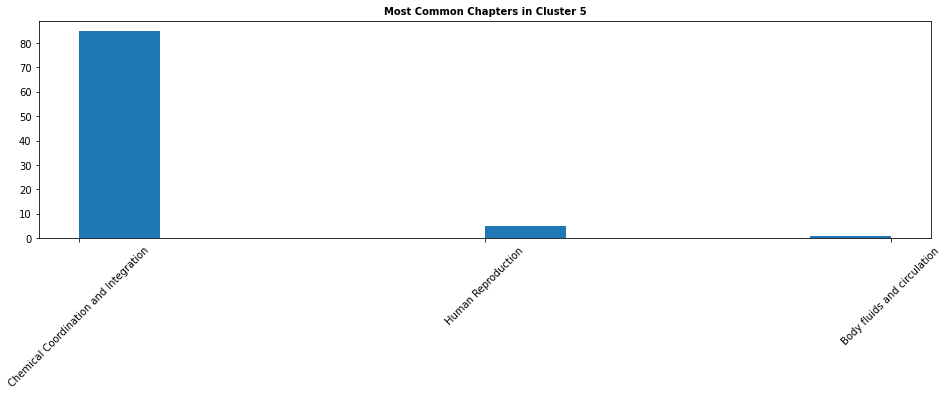

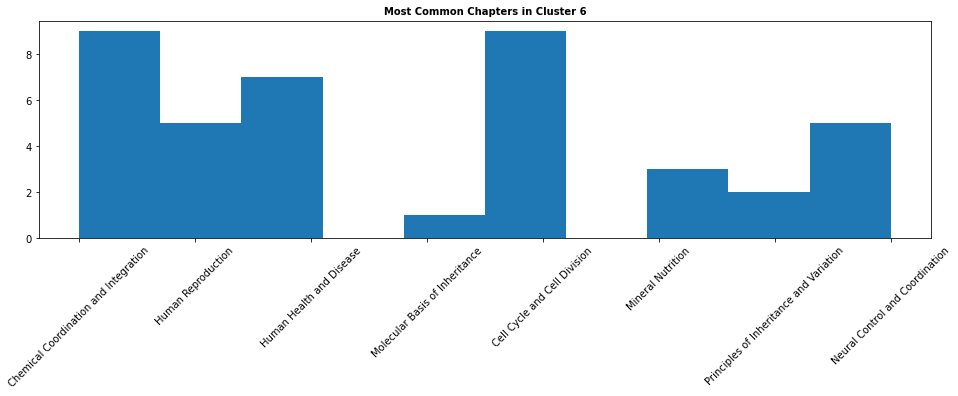

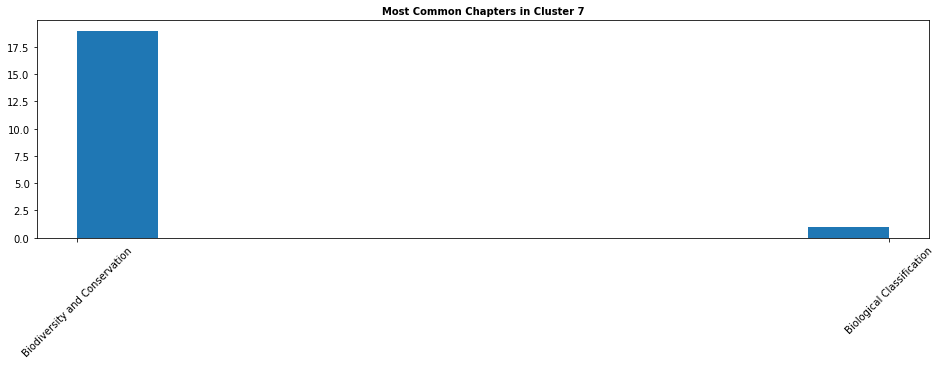

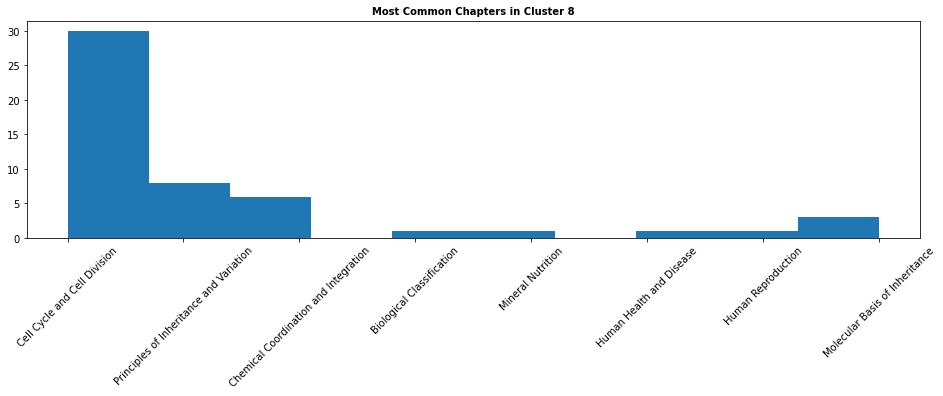

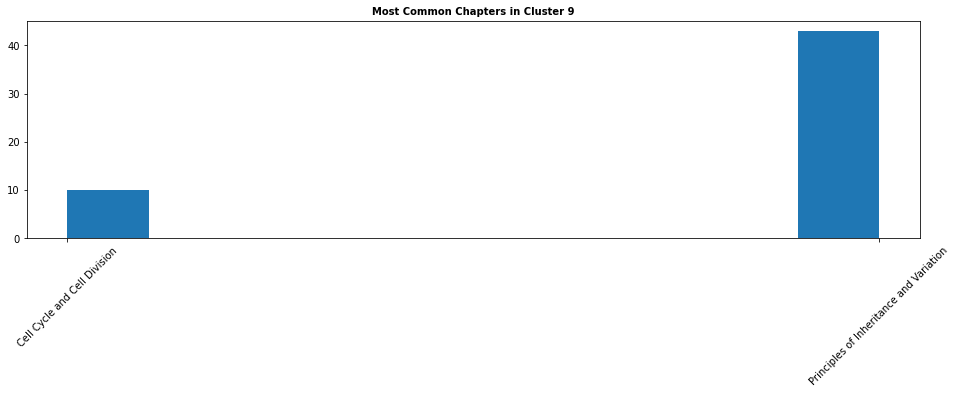

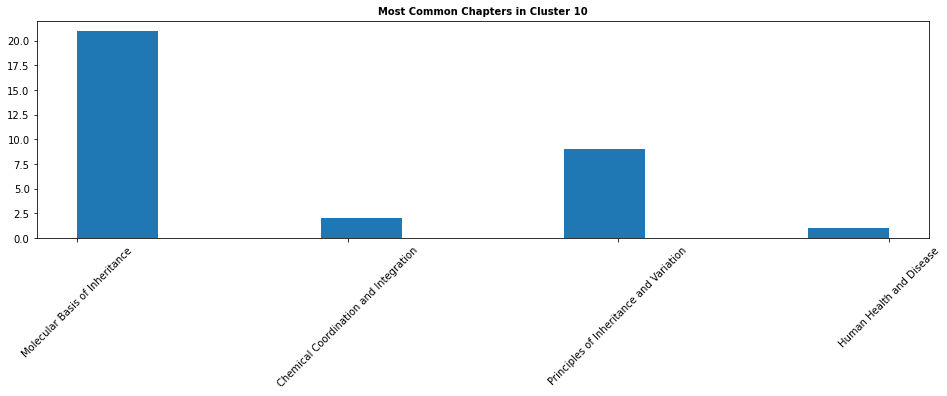

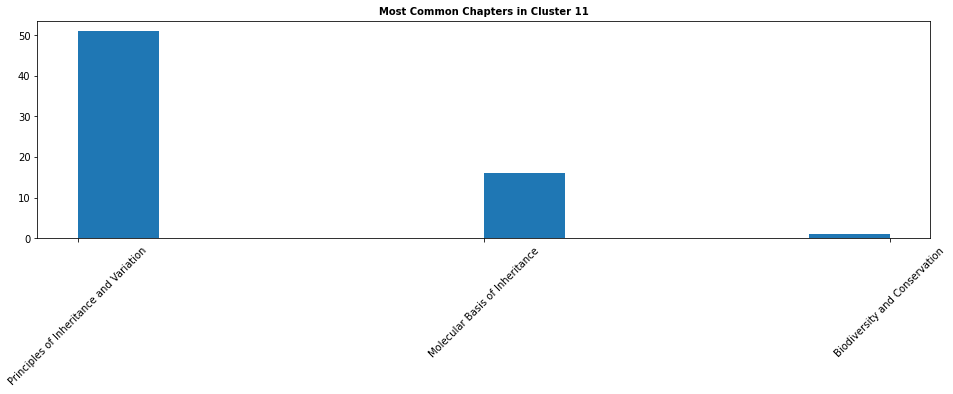

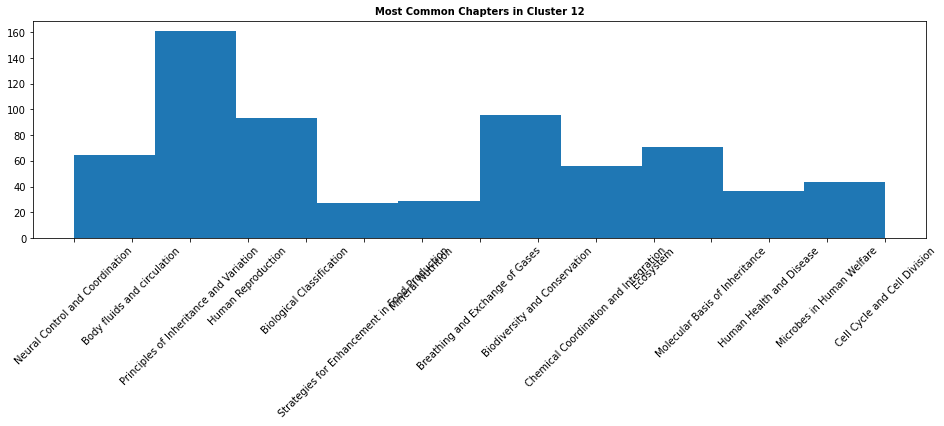

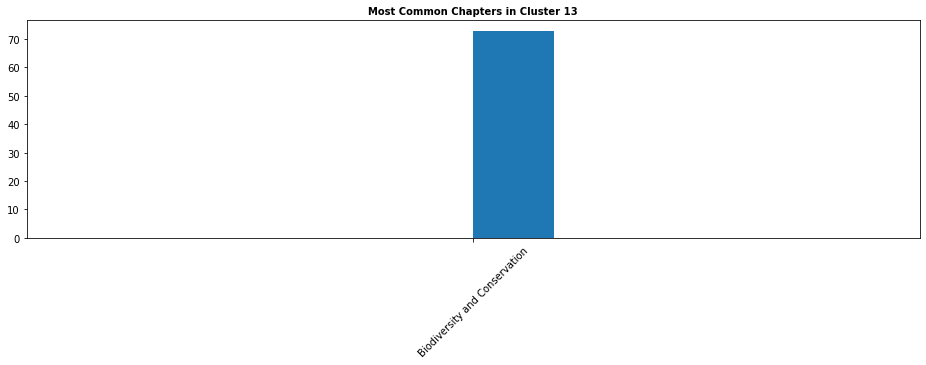

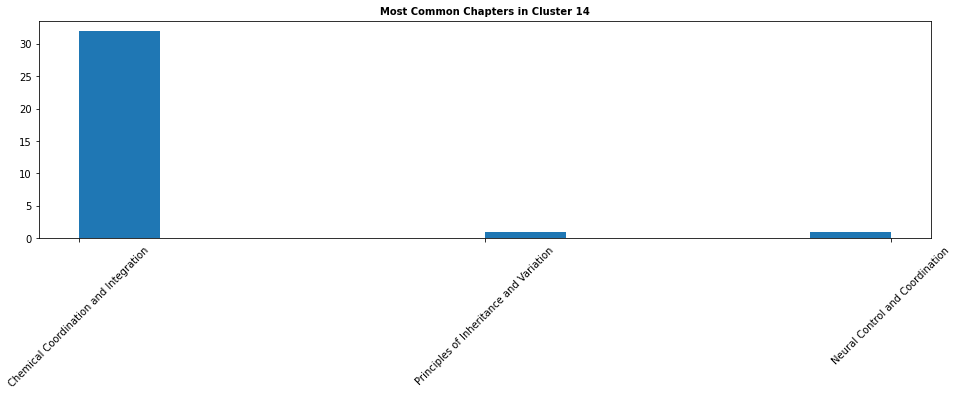

In [ ]:
cluster_label = []
for i in range(0,num_clusters):
    cluster_questions = example_data[example_data['label'] == i ]  #get all questions belonging to cluster i 
    cluster_chapters_list = cluster_questions['ChapterName'].tolist();
    plt.figure(figsize=(16,4))
    plt.hist(cluster_chapters_list)
    plt.xticks(rotation=45)
    cluster_label.append(max(set(cluster_chapters_list), key = cluster_chapters_list.count));
    plt.title(("Most Common Chapters in Cluster {}".format(i)), fontsize=10, fontweight='bold')

    

### We check how many questions are classified to each cluster 



In [ ]:
for i in range(0,num_clusters):
    print('No of Questions belonging to cluster ', i ,'are ',sum(example_data['label'] == i))

No of Questions belonging to cluster  0 are  33
No of Questions belonging to cluster  1 are  58
No of Questions belonging to cluster  2 are  34
No of Questions belonging to cluster  3 are  55
No of Questions belonging to cluster  4 are  53
No of Questions belonging to cluster  5 are  91
No of Questions belonging to cluster  6 are  41
No of Questions belonging to cluster  7 are  20
No of Questions belonging to cluster  8 are  51
No of Questions belonging to cluster  9 are  53
No of Questions belonging to cluster  10 are  33
No of Questions belonging to cluster  11 are  68
No of Questions belonging to cluster  12 are  679
No of Questions belonging to cluster  13 are  73
No of Questions belonging to cluster  14 are  34


In [ ]:
cluster_label[11] # cluster 11 has a very large number of questions in it. 
                #This is beacause Principles of Inheritance and Variation has highest contribution in example data 

'Principles of Inheritance and Variation'

### We now check how many chapter can we cover by using the above method. It is seen that we can only cover 9 chapters out ot 27

In [ ]:
classified_chapters_clusters = np.unique(np.array(cluster_label)).tolist();
print(classified_chapters_clusters, len(classified_chapters_clusters))


['Biodiversity and Conservation', 'Cell Cycle and Cell Division', 'Chemical Coordination and Integration', 'Human Health and Disease', 'Human Reproduction', 'Microbes in Human Welfare', 'Molecular Basis of Inheritance', 'Neural Control and Coordination', 'Principles of Inheritance and Variation'] 9


In [ ]:
example_data.ChapterName.unique().tolist()

['Body fluids and circulation',
 'Neural Control and Coordination',
 'Chemical Coordination and Integration',
 'Biodiversity and Conservation',
 'Principles of Inheritance and Variation',
 'Human Reproduction',
 'Biological Classification',
 'Molecular Basis of Inheritance',
 'Cell Cycle and Cell Division',
 'Microbes in Human Welfare',
 'Strategies for Enhancement in Food Production',
 'Mineral Nutrition',
 'Breathing and Exchange of Gases',
 'Ecosystem',
 'Human Health and Disease']

### Our algorithm classifies data into 15 clusters which major represent 8 out of 15 chapters taken in example data. We see how was the propotion of this chapters in our example data 

In [ ]:
classfied_chapters_df= example_data[example_data['ChapterName'].isin(classified_chapters_clusters)]
classfied_chapters_df = classfied_chapters_df.groupby('ChapterName').count()
classfied_chapters_df

,index,CourseName,SubjectName,TopicName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex,label
ChapterName,,,,,,,,,,
Biodiversity and Conservation,160,160,160,160,160,160,5,160,160,160
Cell Cycle and Cell Division,64,64,64,64,64,64,7,64,64,64
Chemical Coordination and Integration,227,227,227,227,227,227,8,227,227,227
Human Health and Disease,79,79,79,79,79,79,2,79,79,79
Human Reproduction,124,124,124,124,124,124,2,124,124,124
Microbes in Human Welfare,58,58,58,58,58,58,2,58,58,58
Molecular Basis of Inheritance,66,66,66,66,66,66,5,66,66,66
Neural Control and Coordination,84,84,84,84,84,84,2,84,84,84
Principles of Inheritance and Variation,287,287,287,287,287,287,12,287,287,287


### We can see that only those chapters which have >60 questions in examples data have only been able to be classified by our algorithm 

### We now look at the propotion of chapters which could not be represented in our classification

In [ ]:
unclassfied_chapters_df= example_data[[not elem for elem in 
                                           example_data['ChapterName'].isin(classified_chapters_clusters).tolist()]]
unclassfied_chapters_df=  unclassfied_chapters_df.groupby('ChapterName').count()
unclassfied_chapters_df

,index,CourseName,SubjectName,TopicName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex,label
ChapterName,,,,,,,,,,
Biological Classification,34,34,34,34,34,34,4,34,34,34
Body fluids and circulation,37,37,37,37,37,37,1,37,37,37
Breathing and Exchange of Gases,41,41,41,41,41,41,5,41,41,41
Ecosystem,50,50,50,50,50,50,4,50,50,50
Mineral Nutrition,38,38,38,38,38,38,3,38,38,38
Strategies for Enhancement in Food Production,27,27,27,27,27,27,1,27,27,27


### We can see that topics not classified by this algorithm has <60 questions, this means that we need more questions from these topics to classify them correctly 

### Testing the accuracy of this classification on test data 

### We will only use test data from the 8 chapters that we are able to classify correctly and see how accurate our classification is in assigning topics to these questions 

In [ ]:
trial_data
vectorized_trial_data= vectorized_trial_data[trial_data['ChapterName'].isin(classified_chapters_clusters).tolist()];
trial_data_filtered = trial_data[trial_data['ChapterName'].isin(classified_chapters_clusters)]
vectorized_trial_data


,aaatac,aabb,aabbcc,aabbccthe,aac,aadenohypophysis,aag,ab,abcd,abcdefg,abdominal,abedcfg,aberration,aberrations,abgh,abh,ability,abiotic,able,abnormal,abnormalities,abnormality,abo,aboblood,aboutfifteen,abrupt,absence,absent,absorb,absorbed,absorbing,absorbthe,absorption,abundance,abundant,acc,accelerated,accessory,accommodation,accomplished,...,xrays,xxxx,xxxy,xxy,xyy,yawning,ybearing,ychromosome,year,yearround,years,yeast,yeastwhich,yellow,yellowish,ylinked,yoghurt,yolk,york,you,young,zea,zensen,zero,zgene,zinc,zona,zone,zones,zoo,zoocoenosis,zoological,zoology,zoos,zoosc,zoster,zsi,zygote,zygotes,zygotic
1376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predicted_cluster_labels = kmeans_result.predict(vectorized_trial_data)

### We see what chapter the clustering algorithm predicts for us using the test data 

In [ ]:
trial_data_filtered_prediction = trial_data_filtered
trial_data_filtered_prediction['label']=predicted_cluster_labels
trial_data_filtered_prediction['predicted_chapter']=[cluster_label[label] for label in 
                                                     trial_data_filtered_prediction['label'].tolist()]
    
                                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
trial_data_filtered_prediction

,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex,label,predicted_chapter
3,3,7/8 CBSE,Biology,Biology in Human Welfare,Human Health and Disease,Kwashiorkor,35703,NaN,Trial,Kwashiorkor disease is due to deficiency of :\...,4,Human Health and Disease
9,9,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,In situ (on site) Conservation,55588,NaN,Trial,Which of the following is a bird sanctuary?\n(...,12,Principles of Inheritance and Variation
13,13,7/8 CBSE,Biology,Biology in Human Welfare,Microbes in Human Welfare,Bacteria: Role in Agriculture and Industry,78612,NaN,Trial,Which of the following bacteria is are present...,0,Microbes in Human Welfare
28,28,7/8 CBSE,Biology,Biology in Human Welfare,Microbes in Human Welfare,Bacteria: Role in Agriculture and Industry,185929,NaN,Trial,An example of endomycorrhiza is \( \quad \) [N...,0,Microbes in Human Welfare
33,33,7/8 CBSE,Biology,Biology in Human Welfare,Microbes in Human Welfare,Bacteria: Role in Agriculture and Industry,78582,NaN,Trial,Role of de-nitrifying bacteria is to:\n(A) Bre...,12,Principles of Inheritance and Variation
...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1883,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and their Roles - 1,57865,NaN,Trial,The posterior pituitary stores and releases:\n...,5,Chemical Coordination and Integration
1884,1884,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and Their Roles - 2,57828,NaN,Trial,Why insulin not given orally but injected into...,5,Chemical Coordination and Integration
1885,1885,7/8 CBSE,Biology,Ecology,Biodiversity and Conservation,Hot spots,60941,NaN,Trial,What are the total number of hot spots present...,12,Principles of Inheritance and Variation
1892,1892,7/8 CBSE,Biology,Cell Structure and Function,Cell Cycle and Cell Division,Bipolar Mitotic Spindle,139746,NaN,Trial,During the metaphase stage of mitosis spindle ...,12,Principles of Inheritance and Variation


In [ ]:
correct_predictions = trial_data_filtered_prediction[trial_data_filtered_prediction[
    'ChapterName']==trial_data_filtered_prediction['predicted_chapter']]

In [ ]:
test_acctracy = correct_predictions.shape[0]/trial_data_filtered_prediction.shape[0]
print('Accuracy for classfing test data is', test_acctracy* 100)

Accuracy for classfing test data is 56.074766355140184


### Most of the incorrect predictions are into the chapter Principles of Inheritance and Variation. This may be because it forms a huge chunk of our example data

In [ ]:
incorrect_predictions = trial_data_filtered_prediction[trial_data_filtered_prediction
                                            ['ChapterName']!=trial_data_filtered_prediction['predicted_chapter']]
print('Number of incorrect predictions',incorrect_predictions.shape[0]);
print('Incorrect Predictions to Principles of Inheritance and Variation-',
      sum(incorrect_predictions['predicted_chapter']=='Principles of Inheritance and Variation'))

Number of incorrect predictions 141
Incorrect Predictions to Principles of Inheritance and Variation- 124


###  Notes - 
###  There is a need to standardize example data from all topic, currently one topic test data dominates the other

### We can strenthen the 20 limit for min number of questions from a topic 


## Using Deep learning techniques




#### Import libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords, twitter_samples
# from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from string import punctuation
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import time

%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False
# nltk.download('twitter_samples')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


### doing preprocessing

In [ ]:
merged_test_train_data= preProcessDeepLearning(example_data,trial_data,'ChapterName') 
# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 

uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)

corpus ## This is final data to be used 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,label,split
0,Removal of which organ will have least effect ...,0,train
1,Our ear can hear sound waves of the frequency ...,1,train
4,First heart transplant was performed by\n(A) W...,0,train
5,"Which gland prepare you for flight, fear and f...",2,train
7,Biosphere reserves differ from national parks ...,3,train
...,...,...,...
1885,What are the total number of hot spots present...,3,test
1888,Largest heart is of\n(A) Giraffe\n(B) Elephant...,0,test
1889,Toxic effect of carbon monoxide is due to its ...,12,test
1892,During the metaphase stage of mitosis spindle ...,8,test


Preparing dataset for model




In [ ]:
train_x,train_y, test_x, test_y = train_test_split(corpus)


length of test data is -  375
length of train data is -  1376


In [ ]:
# do some custom pre processing
train_x= preProcess(train_x)
test_x  = preProcess(test_x)
train_x[4]

'biosphere reserves differ national parks wild life sanctuaries absence human entry people integral part system plants paid attention animals living organisms brought places preservation prosperity'

### Tokenizing data and padding 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)

print("Example of sentence: ", train_x[4])

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(train_x)
max_len = max_length(training_sequences)

print('Into a sequence of int:', training_sequences[4])

# Pad the sequence to have the same size
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
print('Into a padded sequence:', training_padded[4])

Example of sentence:  biosphere reserves differ national parks wild life sanctuaries absence human entry people integral part system plants paid attention animals living organisms brought places preservation prosperity
Into a sequence of int: [36, 118, 1598, 16, 88, 131, 132, 119, 776, 15, 956, 322, 1209, 89, 102, 11, 1599, 1600, 28, 166, 143, 777, 1601, 957, 2432]
Into a padded sequence: [  36  118 1598   16   88  131  132  119  776   15  956  322 1209   89
  102   11 1599 1600   28  166  143  777 1601  957 2432    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [ ]:
# See the first 10 words in the vocabulary

word_index = tokenizer.word_index
for i, word in enumerate(word_index):
    print(word, word_index.get(word))
    if i==9:
        break
vocab_size = len(word_index)+1
print(vocab_size)

<UNK> 1
gene 2
cell 3
hormone 4
genes 5
gland 6
cells 7
blood 8
chromosome 9
species 10
5174


### Defining model  and callbacks

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm

def define_model_cnn(filters = 100, kernel_size = 3, activation='relu', input_dim = None, output_dim=300, len_max = None, no_labels= 3 ):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, 
                                  output_dim=output_dim, 
                                  input_length=len_max, 
                                  input_shape=(len_max, )),
        
        tf.keras.layers.Conv1D(filters=filters, kernel_size = kernel_size, activation = activation, 
                               # set 'axis' value to the first and second axis of conv1D weights (rows, cols)
                               kernel_constraint= MaxNorm( max_value=3, axis=[0,1])),
        
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation=activation, 
                              # set axis to 0 to constrain each weight vector of length (input_dim,) in dense layer
                              kernel_constraint = MaxNorm( max_value=3, axis=0)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=no_labels, activation='softmax')
    ])
    
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     model.summary()
    return model

In [ ]:
model_0 = define_model_cnn( input_dim=1000, len_max=100, no_labels=10 )
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          1552200   
                                                                 
 conv1d (Conv1D)             (None, 98, 100)           90100     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 100)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4900)              0         
                                                                 
 dropout (Dropout)           (None, 4900)              0         
                                                                 
 dense (Dense)               (None, 10)                49010     
                                                        

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    # Overide the method on_epoch_end() for our benefit
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.93):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training=True


callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)
# callbacks = myCallback()

### Testing different kernel sizes

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activations = ['relu', 'tanh']
filters = 100
kernel_sizes = [1, 2, 3, 4, 5, 6]

columns = ['Activation', 'Filters', 'Acc']
record = pd.DataFrame(columns = columns)


for activation in activations:

    for kernel_size in kernel_sizes:

        # encode data using
        # Cleaning and Tokenization
        tokenizer = Tokenizer(oov_token=oov_tok)
        tokenizer.fit_on_texts(train_x)

        # Turn the text into sequence
        training_sequences = tokenizer.texts_to_sequences(train_x)
        test_sequences = tokenizer.texts_to_sequences(test_x)

        max_len = max_length(training_sequences)

        # Pad the sequence to have the same size
        Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
        Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

        word_index = tokenizer.word_index
        vocab_size = len(word_index)+1

        # Define the input shape
        model = define_model_cnn(filters, kernel_size, activation, input_dim=vocab_size, len_max=max_len, no_labels = no_labels)
         # Train the model
        model.fit(Xtrain, train_y, batch_size=50, epochs=60, verbose=2, callbacks=[callbacks], validation_data=(Xtest, test_y))

        # evaluate the model
        loss, acc = model.evaluate(Xtest, test_y, verbose=0)
        print('Test Accuracy: {}'.format(acc*100))

        parameters = [activation, kernel_size]
        entries = parameters + [acc]

        temp = pd.DataFrame([entries], columns=columns)
        record = record.append(temp, ignore_index=True)
        print()
        print(record)
        print()

Epoch 1/60
28/28 - 6s - loss: 2.6698 - accuracy: 0.1395 - val_loss: 2.6104 - val_accuracy: 0.1920 - 6s/epoch - 227ms/step
Epoch 2/60
28/28 - 5s - loss: 2.6181 - accuracy: 0.1875 - val_loss: 2.5806 - val_accuracy: 0.2240 - 5s/epoch - 169ms/step
Epoch 3/60
28/28 - 5s - loss: 2.5265 - accuracy: 0.1831 - val_loss: 2.4180 - val_accuracy: 0.2427 - 5s/epoch - 168ms/step
Epoch 4/60
28/28 - 5s - loss: 2.3067 - accuracy: 0.2391 - val_loss: 2.0997 - val_accuracy: 0.2560 - 5s/epoch - 166ms/step
Epoch 5/60
28/28 - 4s - loss: 2.0725 - accuracy: 0.3016 - val_loss: 1.9000 - val_accuracy: 0.3653 - 4s/epoch - 148ms/step
Epoch 6/60
28/28 - 3s - loss: 1.8556 - accuracy: 0.3786 - val_loss: 1.7158 - val_accuracy: 0.4667 - 3s/epoch - 112ms/step
Epoch 7/60


KeyboardInterrupt: ignored

In [ ]:
record.sort_values(by='Acc', ascending=False)


,Activation,Filters,Acc
6,tanh,1,0.826667
11,tanh,6,0.813333
9,tanh,4,0.810667
8,tanh,3,0.805333
7,tanh,2,0.802667
...,...,...,...
1,relu,2,0.754667
0,relu,1,0.704000
4,relu,5,0.693333
5,relu,6,0.677333


### Run model on bio data 

In [ ]:
# Parameter Initialization

def run_cnn_model(no_labels, activation, kernel_size,train_x,test_x,train_test =''):
      trunc_type='post'
      padding_type='post'
      oov_tok = "<UNK>"
      filters = 100
 

      columns = ['Activation', 'Filters', 'Acc']
      record = pd.DataFrame(columns = columns)


      # encode data using
      # Cleaning and Tokenization
      tokenizer = Tokenizer(oov_token=oov_tok)
      tokenizer.fit_on_texts(train_x)

      # Turn the text into sequence
      training_sequences = tokenizer.texts_to_sequences(train_x)
      test_sequences = tokenizer.texts_to_sequences(test_x)

      max_len = max_length(training_sequences)

      # Pad the sequence to have the same size
      Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
      Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

      word_index = tokenizer.word_index
      vocab_size = len(word_index)+1

      # Define the input shape
      model = define_model_cnn(filters, kernel_size, activation, input_dim=vocab_size, len_max=max_len,no_labels = no_labels)
        # Train the model
      model.fit(Xtrain, train_y, batch_size=50, epochs=60, verbose=2, callbacks=[callbacks], validation_data=(Xtest, test_y))

      # evaluate the model
      loss, acc = model.evaluate(Xtest, test_y, verbose=0)
      print('Test Accuracy: {}'.format(acc*100))

      parameters = [activation, kernel_size]
      entries = parameters + [acc]

      temp = pd.DataFrame([entries], columns=columns)
      record = record.append(temp, ignore_index=True)
      print()
      print(record)
      print()
      return  model

In [ ]:
model_bio=  run_cnn_model(no_labels= no_labels, activation= 'tanh', kernel_size = 1,train_x=train_x ,test_x= test_x)

Epoch 1/60
28/28 - 35s - loss: 2.5855 - accuracy: 0.1722 - val_loss: 2.4697 - val_accuracy: 0.2240 - 35s/epoch - 1s/step
Epoch 2/60
28/28 - 3s - loss: 2.4957 - accuracy: 0.2173 - val_loss: 2.3652 - val_accuracy: 0.2773 - 3s/epoch - 104ms/step
Epoch 3/60
28/28 - 3s - loss: 2.2920 - accuracy: 0.3387 - val_loss: 2.1810 - val_accuracy: 0.4480 - 3s/epoch - 115ms/step
Epoch 4/60
28/28 - 3s - loss: 1.9475 - accuracy: 0.4542 - val_loss: 1.8186 - val_accuracy: 0.4827 - 3s/epoch - 118ms/step
Epoch 5/60
28/28 - 3s - loss: 1.6219 - accuracy: 0.5363 - val_loss: 1.6294 - val_accuracy: 0.5627 - 3s/epoch - 117ms/step
Epoch 6/60
28/28 - 3s - loss: 1.4281 - accuracy: 0.5836 - val_loss: 1.4923 - val_accuracy: 0.6133 - 3s/epoch - 112ms/step
Epoch 7/60
28/28 - 3s - loss: 1.2229 - accuracy: 0.6424 - val_loss: 1.3740 - val_accuracy: 0.6347 - 3s/epoch - 116ms/step
Epoch 8/60
28/28 - 3s - loss: 1.1023 - accuracy: 0.6948 - val_loss: 1.2825 - val_accuracy: 0.6613 - 3s/epoch - 115ms/step
Epoch 9/60
28/28 - 3s - l

### make pred

In [ ]:
predicted_df = make_pred(model_bio,test_x= test_x, corpus= corpus)
predicted_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,CorrectLabel
3,Kwashiorkor disease is due to deficiency of :\...,14,test,Human Health and Disease,Human Health and Disease
6,In Whittaker's five kingdom classification uni...,6,test,Principles of Inheritance and Variation,Biological Classification
9,Which of the following is a bird sanctuary?\n(...,3,test,Biodiversity and Conservation,Biodiversity and Conservation
13,Which of the following bacteria is are present...,9,test,Microbes in Human Welfare,Microbes in Human Welfare
28,An example of endomycorrhiza is \( \quad \) [N...,9,test,Microbes in Human Welfare,Microbes in Human Welfare
...,...,...,...,...,...
1885,What are the total number of hot spots present...,3,test,Biodiversity and Conservation,Biodiversity and Conservation
1888,Largest heart is of\n(A) Giraffe\n(B) Elephant...,0,test,Body fluids and circulation,Body fluids and circulation
1889,Toxic effect of carbon monoxide is due to its ...,12,test,Breathing and Exchange of Gases,Breathing and Exchange of Gases
1892,During the metaphase stage of mitosis spindle ...,8,test,Cell Cycle and Cell Division,Cell Cycle and Cell Division


In [ ]:
predicted_df[predicted_df['First_prediction'] != predicted_df['CorrectLabel']]

,sentence,label,split,First_prediction,CorrectLabel
6,In Whittaker's five kingdom classification uni...,6,test,Principles of Inheritance and Variation,Biological Classification
30,Choose the wrong statement-\n(A) Respiratory p...,12,test,Strategies for Enhancement in Food Production,Breathing and Exchange of Gases
40,"When the cell is placed in water, it takes wat...",11,test,Ecosystem,Mineral Nutrition
48,"The enzyme, nitrogenase which is capable of ni...",11,test,Biological Classification,Mineral Nutrition
76,Vasoconstriction causes\n(A) Increase in heart...,0,test,Chemical Coordination and Integration,Body fluids and circulation
...,...,...,...,...,...
1779,Meiosis takes place in\n(A) Apical meristem\n(...,8,test,Principles of Inheritance and Variation,Cell Cycle and Cell Division
1809,(i) Name an exotic variety of honey bee grown ...,10,test,Body fluids and circulation,Strategies for Enhancement in Food Production
1827,Regulator gene controls chemical synthesis (op...,7,test,Principles of Inheritance and Variation,Molecular Basis of Inheritance
1860,Whether a child died after normal birth or die...,12,test,Chemical Coordination and Integration,Breathing and Exchange of Gases


### importing the phy and chm datasets 

In [ ]:
chm_data = pd.read_csv('data-chm.csv')
phy_data = pd.read_csv('data-phy.csv')
chm_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)


### Analysis for CHM data 

In [ ]:
example_data,trial_data = example_trial_split(chm_data)
# exploring the example_data 
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )


number of example data are 1500
number of trial data are 500
Number of topics covered by example data 7
Number of Chapters covered by example data 13
Number of KSC covered by example data 131
Questions lacking latex data  0


Number of topics covered by example data 7
Number of Chapters covered by example data 14
Number of KSC covered by example data 160
Questions lacking latex data  0


In [ ]:
label_name= 'ChapterName'; # label based on which we need to classify the data 
merged_test_train_data= preProcessDeepLearning(example_data,trial_data,label_name) 
# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
corpus ## This is final data to be used 

No of unique ChapterName are 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,label,split
4,Which of the following dissolves in ionic solv...,0,train
13,Camphor is often used in molecular mass determ...,0,train
18,Which of the followingis not represented by so...,1,train
19,Which of the following method is used for sol....,1,train
20,When a small amount of \( \mathrm{FeCl}_{3} \)...,1,train
...,...,...,...
1994,What are the products of hydrolysis of sucrose...,4,test
1996,What are enzymes? (Comptt. All India 2014),4,test
1997,Give reasons for the following:\r\n(All India ...,9,test
1998,Hydroboration oxidation and acid hydration wil...,2,test


In [ ]:
train_x,train_y, test_x, test_y = train_test_split(corpus)


length of test data is -  1500
length of train data is -  500


In [ ]:
model_chm =  run_cnn_model(no_labels= no_labels, activation= 'tanh', kernel_size = 1,train_x=train_x ,test_x= test_x)

Epoch 1/60
10/10 - 3s - loss: 2.4737 - accuracy: 0.2660 - val_loss: 2.3154 - val_accuracy: 0.3240 - 3s/epoch - 298ms/step
Epoch 2/60
10/10 - 2s - loss: 2.4102 - accuracy: 0.2940 - val_loss: 2.2856 - val_accuracy: 0.3273 - 2s/epoch - 162ms/step
Epoch 3/60
10/10 - 2s - loss: 2.2707 - accuracy: 0.3160 - val_loss: 2.2473 - val_accuracy: 0.3327 - 2s/epoch - 164ms/step
Epoch 4/60
10/10 - 2s - loss: 2.1900 - accuracy: 0.3420 - val_loss: 2.2072 - val_accuracy: 0.3360 - 2s/epoch - 156ms/step
Epoch 5/60
10/10 - 2s - loss: 2.1337 - accuracy: 0.3580 - val_loss: 2.1730 - val_accuracy: 0.3713 - 2s/epoch - 157ms/step
Epoch 6/60
10/10 - 2s - loss: 1.9588 - accuracy: 0.4180 - val_loss: 2.0506 - val_accuracy: 0.3673 - 2s/epoch - 162ms/step
Epoch 7/60
10/10 - 2s - loss: 1.8450 - accuracy: 0.4880 - val_loss: 1.9676 - val_accuracy: 0.4640 - 2s/epoch - 154ms/step
Epoch 8/60
10/10 - 2s - loss: 1.6999 - accuracy: 0.5500 - val_loss: 1.8621 - val_accuracy: 0.5067 - 2s/epoch - 169ms/step
Epoch 9/60
10/10 - 2s - 

### Accuracy before custom pre processing - 72 %
### Accuracy of custom pre processed data - 80 %

In [ ]:
predicted_df = make_pred(model_chm,test_x= test_x, corpus= corpus)
predicted_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,CorrectLabel
0,Answer the following questions briefy :\r\n(i)...,4,test,"Alcohols, Phenols and Ethers",Biomolecules
1,Write IUPAC name of the following compound: \(...,3,test,Amines,Amines
2,Why is a solution of potassium hydroxide used ...,11,test,Basic Principles of Organic Chemistry,Basic principles and techniques in Organic Che...
3,Addition of HCl to propene in presence of pero...,2,test,Alkenes,Alkenes
5,"What are carbohydrates? [Board March, 2016]\r\...",4,test,Biomolecules,Biomolecules
...,...,...,...,...,...
1994,What are the products of hydrolysis of sucrose...,4,test,Biomolecules,Biomolecules
1996,What are enzymes? (Comptt. All India 2014),4,test,Biomolecules,Biomolecules
1997,Give reasons for the following:\r\n(All India ...,9,test,Adsorption and Colloids,"Alcohols, Phenols and Ethers"
1998,Hydroboration oxidation and acid hydration wil...,2,test,Alkenes,Alkenes


In [ ]:
predicted_df[predicted_df['First_prediction'] != predicted_df['CorrectLabel']]

,sentence,label,split,First_prediction,CorrectLabel
0,Answer the following questions briefy :\r\n(i)...,4,test,"Alcohols, Phenols and Ethers",Biomolecules
2,Why is a solution of potassium hydroxide used ...,11,test,Basic Principles of Organic Chemistry,Basic principles and techniques in Organic Che...
6,What is the action of conc. sulphuric acid on ...,9,test,"Alcohol, Phenols and Ethers","Alcohols, Phenols and Ethers"
7,What is meant by hybridization? Compound \( \m...,0,test,Basic principles and techniques in Organic Che...,Basic Principles of Organic Chemistry
8,What happens when phenol is treated with bromi...,9,test,Biomolecules,"Alcohols, Phenols and Ethers"
...,...,...,...,...,...
1986,(a) Arrange the following compounds in an incr...,7,test,Alkenes,"Aldehydes, Ketones and Carboxylic Acids"
1987,A diatomic molecule has dipole moment of \( 1....,8,test,"Alcohols, Phenols and Ethers",Chemical Bonding
1991,Why is paper moistened before filtration?,6,test,Adsorption and Colloids,Basic Analytical Techniques
1992,If a molecule \( \mathrm{MX}_{3} \) has zero d...,8,test,Adsorption and Colloids,Chemical Bonding


### Topics not correctly classified belong to very silimar other topics, some are even same with slight spelling differences, eg Alcohol, Phenols and Ethers	and Alcohols, Phenols and Ethers	

### Analysis for Phy data 

In [ ]:
phy_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)
example_data,trial_data = example_trial_split(phy_data)



# exploring the example_data 
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )

number of example data are 836
number of trial data are 250
Number of topics covered by example data 6
Number of Chapters covered by example data 12
Number of KSC covered by example data 33
Questions lacking latex data  0


In [ ]:
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,'ChapterName')

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
corpus ## This is final data to be used 

No of unique ChapterName are 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,label,split
2,An electric fan has blades of length \( 30 \ma...,0,train
5,If the initial velocity of a projectile be dou...,1,train
7,A paramagnetic material shows a net magnetizat...,2,train
13,"If a piece of metal was thought to be magnet, ...",3,train
15,The length of second's hand in a watch is \( 1...,0,train
...,...,...,...
1080,"If the velocity of light c, gravitational cons...",4,test
1081,The velocity of water waves \( \mathrm{v} \) m...,4,test
1083,In C.G.S. system the magnitutde of the force i...,4,test
1084,Match List I with List II and select the corre...,4,test


In [ ]:
train_x,train_y, test_x, test_y = train_test_split(corpus)


length of test data is -  836
length of train data is -  250


In [ ]:
model_phy =  run_cnn_model(no_labels= no_labels, activation= 'tanh', kernel_size = 1,train_x=train_x ,test_x= test_x)

Epoch 1/60
17/17 - 2s - loss: 2.3453 - accuracy: 0.2524 - val_loss: 2.1717 - val_accuracy: 0.3600 - 2s/epoch - 147ms/step
Epoch 2/60
17/17 - 1s - loss: 2.2548 - accuracy: 0.3218 - val_loss: 2.1506 - val_accuracy: 0.3600 - 918ms/epoch - 54ms/step
Epoch 3/60
17/17 - 1s - loss: 2.1048 - accuracy: 0.3481 - val_loss: 1.9928 - val_accuracy: 0.3600 - 959ms/epoch - 56ms/step
Epoch 4/60
17/17 - 1s - loss: 1.9180 - accuracy: 0.4486 - val_loss: 1.8350 - val_accuracy: 0.4440 - 911ms/epoch - 54ms/step
Epoch 5/60
17/17 - 1s - loss: 1.7309 - accuracy: 0.5156 - val_loss: 1.7010 - val_accuracy: 0.5000 - 1s/epoch - 63ms/step
Epoch 6/60
17/17 - 1s - loss: 1.6540 - accuracy: 0.5299 - val_loss: 1.6073 - val_accuracy: 0.5240 - 965ms/epoch - 57ms/step
Epoch 7/60
17/17 - 1s - loss: 1.5117 - accuracy: 0.5706 - val_loss: 1.5708 - val_accuracy: 0.5360 - 943ms/epoch - 55ms/step
Epoch 8/60
17/17 - 1s - loss: 1.4091 - accuracy: 0.6148 - val_loss: 1.4678 - val_accuracy: 0.5240 - 919ms/epoch - 54ms/step
Epoch 9/60
17

In [ ]:
pred_df = make_pred(model_phy,test_x,corpus)
pred_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,CorrectLabel
2,An electric fan has blades of length \( 30 \ma...,4,test,Circular Motion,Circular Motion
5,If the initial velocity of a projectile be dou...,6,test,Projectile,Projectile
7,A paramagnetic material shows a net magnetizat...,3,test,"Magnetism, Magnetic Effects of Current",Magnetic Materials
13,"If a piece of metal was thought to be magnet, ...",7,test,"Magnetism, Magnetic Effects of Current",Magnetism
15,The length of second's hand in a watch is \( 1...,4,test,Circular Motion,Circular Motion
...,...,...,...,...,...
1054,Assertion : Electromagnets are made of soft ir...,1,test,"Magnetism, Magnetic Effects of Current","Magnetism, Magnetic Effects of Current"
1055,The correct graph which shows the variation of...,1,test,Magnetic Materials,"Magnetism, Magnetic Effects of Current"
1063,Two wires \( \mathrm{W}_{1} \& \mathrm{~W}_{2}...,1,test,"Magnetism, Magnetic Effects of Current","Magnetism, Magnetic Effects of Current"
1079,A beam of electrons of energy E scatters from ...,5,test,"Unit, Vector and Dimension",Wave Optics


### Validation accuracy is stuck at 36 % with sigmoid filter, accuracy around 60% with tanh 

### Doing analysis for total dataset 

### Predicting Chapter

In [ ]:
total_data= pd.read_csv('total_data.csv')
total_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)
example_data,trial_data = example_trial_split(total_data)



# exploring the example_data 
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )
total_data

number of example data are 5353
number of trial data are 1661
Number of topics covered by example data 27
Number of Chapters covered by example data 61
Number of KSC covered by example data 382
Questions lacking latex data  0


,Unnamed: 0,Unnamed: 0.1,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex
0,0,0.0,0.0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...
1,1,1.0,4.0,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...
2,2,2.0,8.0,7/8 CBSE,Biology,Ecology,Environmental Issues,EL NINO Effect,61282,"<html><body><div><img src= ""data:img/jpg;base6...",Example,"Temperature inversions, heat islands, and dust..."
3,3,3.0,9.0,7/8 CBSE,Biology,Biology in Human Welfare,Human Health and Disease,Kwashiorkor,35703,NaN,Trial,Kwashiorkor disease is due to deficiency of :\...
4,4,4.0,10.0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...
...,...,...,...,...,...,...,...,...,...,...,...,...
7009,1995,NaN,NaN,9/10 CBSE,Maths,Maths -10th,Areas Related to Circles,Area Of Circle,71915,NaN,Example,The radii of two circles are \( 19 \mathrm{~cm...
7010,1996,NaN,NaN,9/10 CBSE,Maths,Maths -8th,Algebraic Expressions and Identities,Algebraic Identities : Basic Expansion,13037,NaN,Example,"If \( x y+y x=-1(x, y \neq 0) \), the value of..."
7011,1997,NaN,NaN,9/10 CBSE,Maths,Maths -6th,Angles,Straight Angles and Adjacent Angles,6327,NaN,Example,\( a+b= \)\n90\n\( b \)\n(a) \( 235^{\circ} \)...
7012,1998,NaN,NaN,9/10 CBSE,Maths,Maths -10th,Areas Related to Circles,Area of Sector and Arc Length,45843,NaN,Example,A chord of circle \( 14 \mathrm{~cm} \) makes ...


In [ ]:
total_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)
example_data,trial_data = example_trial_split(total_data)



# exploring the example_data 
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )

number of example data are 3853
number of trial data are 1161
Number of topics covered by example data 21
Number of Chapters covered by example data 54
Number of KSC covered by example data 455
Questions lacking latex data  0


In [ ]:
label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
corpus ## This is final data to be used 

No of unique ChapterName are 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,label,split
3,Kwashiorkor disease is due to deficiency of :\...,0,train
6,In Whittaker's five kingdom classification uni...,1,train
9,Which of the following is a bird sanctuary?\n(...,2,train
13,Which of the following bacteria is are present...,3,train
28,An example of endomycorrhiza is \( \quad \) [N...,3,train
...,...,...,...
7008,Three circles each of radius \( 3.5 \mathrm{~c...,53,test
7009,The radii of two circles are \( 19 \mathrm{~cm...,53,test
7010,"If \( x y+y x=-1(x, y \neq 0) \), the value of...",56,test
7011,\( a+b= \)\n90\n\( b \)\n(a) \( 235^{\circ} \)...,55,test


In [ ]:
train_x,train_y, test_x, test_y = train_test_split(corpus)


length of test data is -  5353
length of train data is -  1661


In [ ]:
model_total_chapter = run_cnn_model(no_labels= no_labels, activation= 'tanh', kernel_size = 1,train_x=train_x ,test_x= test_x,train_test= train_test)


Epoch 1/60
78/78 - 6s - loss: 3.8251 - accuracy: 0.0820 - val_loss: 3.5353 - val_accuracy: 0.1947 - 6s/epoch - 78ms/step
Epoch 2/60
78/78 - 6s - loss: 3.4234 - accuracy: 0.1908 - val_loss: 3.0932 - val_accuracy: 0.2593 - 6s/epoch - 74ms/step
Epoch 3/60
78/78 - 5s - loss: 2.9997 - accuracy: 0.2671 - val_loss: 2.7411 - val_accuracy: 0.3635 - 5s/epoch - 63ms/step
Epoch 4/60
78/78 - 5s - loss: 2.6558 - accuracy: 0.3405 - val_loss: 2.4333 - val_accuracy: 0.4703 - 5s/epoch - 61ms/step
Epoch 5/60
78/78 - 5s - loss: 2.3702 - accuracy: 0.4220 - val_loss: 2.1843 - val_accuracy: 0.5469 - 5s/epoch - 66ms/step
Epoch 6/60
78/78 - 5s - loss: 2.1500 - accuracy: 0.4775 - val_loss: 1.9815 - val_accuracy: 0.6012 - 5s/epoch - 67ms/step
Epoch 7/60
78/78 - 5s - loss: 1.9834 - accuracy: 0.5092 - val_loss: 1.8330 - val_accuracy: 0.6288 - 5s/epoch - 62ms/step
Epoch 8/60
78/78 - 5s - loss: 1.8646 - accuracy: 0.5201 - val_loss: 1.7263 - val_accuracy: 0.6425 - 5s/epoch - 63ms/step
Epoch 9/60
78/78 - 5s - loss: 1.

### Predicting KSC of question, by first predicting chapterName and then KSC 

In [ ]:
chapter_model = model
predictions= model.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['Chapter_code'].tolist()
correct_labels = [chapter_mapping[chapter_mapping['Chapter_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping[chapter_mapping['Chapter_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

['Human Health and Disease',
 'Biological Classification',
 'Biodiversity and Conservation',
 'Microbes in Human Welfare',
 'Microbes in Human Welfare',
 'Aldehydes, Ketones and Carboxylic Acids',
 'Chemical Coordination and Integration',
 'Environmental Issues',
 'Projectile',
 'Principles of Inheritance and Variation']

In [ ]:
test_corpus['First_prediction'] = first_predicted_labels
test_corpus['ChapterName'] = correct_labels
test_corpus[test_corpus['First_prediction'] == test_corpus['ChapterName']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sentence,label,split,Chapter_code,First_prediction,ChapterName
3,Kwashiorkor disease is due to deficiency of :\...,19,test,19,Human Health and Disease,Human Health and Disease
6,In Whittaker's five kingdom classification uni...,7,test,7,Biological Classification,Biological Classification
9,Which of the following is a bird sanctuary?\n(...,4,test,4,Biodiversity and Conservation,Biodiversity and Conservation
13,Which of the following bacteria is are present...,10,test,10,Microbes in Human Welfare,Microbes in Human Welfare
28,An example of endomycorrhiza is \( \quad \) [N...,10,test,10,Microbes in Human Welfare,Microbes in Human Welfare
...,...,...,...,...,...,...
1052,"Two gold pieces, each of mass \( 0.035 \mathrm...",41,test,41,"Unit, Vector and Dimension","Unit, Vector and Dimension"
1053,Why ferromagnetic substance are used to make p...,42,test,42,"Magnetism, Magnetic Effects of Current","Magnetism, Magnetic Effects of Current"
1054,Assertion : Electromagnets are made of soft ir...,42,test,42,"Magnetism, Magnetic Effects of Current","Magnetism, Magnetic Effects of Current"
1055,The correct graph which shows the variation of...,42,test,42,"Magnetism, Magnetic Effects of Current","Magnetism, Magnetic Effects of Current"


### Training on biology data for KSC 

In [ ]:
merged_test_train_data = example_data.append(trial_data)
merged_test_train_data

example_data['split']= 'train'
test_data = trial_data
test_data['split'] = 'test'
merged_test_train_data = example_data.append(trial_data)
merged_test_train_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,CourseName,SubjectName,TopicName,ChapterName,KSCText,QuestionId,imageHTML,UseAs,Q_Latex,split
0,0,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Lymphatic Organs: Spleen -1,37496,NaN,Example,Removal of which organ will have least effect ...,train
1,4,7/8 CBSE,Biology,Human Physiology,Neural Control and Coordination,Functions of Ear,37798,NaN,Example,Our ear can hear sound waves of the frequency ...,train
2,8,7/8 CBSE,Biology,Ecology,Environmental Issues,EL NINO Effect,61282,"<html><body><div><img src= ""data:img/jpg;base6...",Example,"Temperature inversions, heat islands, and dust...",train
4,10,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,37463,NaN,Example,First heart transplant was performed by\n(A) W...,train
5,11,7/8 CBSE,Biology,Human Physiology,Chemical Coordination and Integration,Endocrine Glands and their Roles - 1,150425,NaN,Example,"Which gland prepare you for flight, fear and f...",train
...,...,...,...,...,...,...,...,...,...,...,...
1888,3215,7/8 CBSE,Biology,Human Physiology,Body fluids and circulation,Important Points-2,64465,"<html><body><div><img src= ""data:img/jpg;base6...",Trial,Largest heart is of\n(A) Giraffe\n(B) Elephant...,test
1889,3216,7/8 CBSE,Biology,Human Physiology,Breathing and Exchange of Gases,Transportation of Carbon Dioxide-1,36389,NaN,Trial,Toxic effect of carbon monoxide is due to its ...,test
1892,3219,7/8 CBSE,Biology,Cell Structure and Function,Cell Cycle and Cell Division,Bipolar Mitotic Spindle,139746,NaN,Trial,During the metaphase stage of mitosis spindle ...,test
1904,3231,7/8 CBSE,Biology,Genetics and Evolution,Principles of Inheritance and Variation,X - chromosome linked inheritance,33619,NaN,Trial,Which one of the following is an example of X ...,test


In [ ]:
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(merged_test_train_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )

Number of topics covered by example data 8
Number of Chapters covered by example data 27
Number of KSC covered by example data 273
Questions lacking latex data  0


### Some of the KSC around 20 are not even present in the example data 

In [ ]:
merged_test_train_data =merged_test_train_data[['Q_Latex','KSCText','split']]
merged_test_train_data.rename(columns = {'Q_Latex':'sentence',	'KSCText':'label'}, inplace = True)
uniq_chapte_list = merged_test_train_data['label'].unique().tolist()
merged_test_train_data['KSC_code'] = [uniq_chapte_list.index(chapterName) for chapterName in merged_test_train_data['label'].tolist()] 

corpus= merged_test_train_data
ksc_mapping= corpus[['label','KSC_code']]
corpus['label'] = corpus['KSC_code']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x = list(corpus[corpus.split=='train'].sentence)
train_y = np.array(corpus[corpus.split=='train'].label)
print(len(train_x))
print(len(train_y))

test_x = list(corpus[corpus.split=='test'].sentence)
test_y = np.array(corpus[corpus.split=='test'].label)

print('Text Before Pre processing - ',train_x[3])

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])

print(len(test_x))
print(len(test_y))

1517
1517
Text Before Pre processing -  First heart transplant was performed by
(A) William Harvey
(B) Watson
(C) Christian Bernard
(D) Khorana
Text After Pre processing -  first heart transplant performed william harvey watson christian bernard khorana
411
411


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm

def define_model(filters = 100, kernel_size = 3, activation='relu', input_dim = None, output_dim=300, max_length = None, no_labels = 3 ) :
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, 
                                  output_dim=output_dim, 
                                  input_length=max_length, 
                                  input_shape=(max_length, )),
        
        tf.keras.layers.Conv1D(filters=filters, kernel_size = kernel_size, activation = activation, 
                               # set 'axis' value to the first and second axis of conv1D weights (rows, cols)
                               kernel_constraint= MaxNorm( max_value=3, axis=[0,1])),
        
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation=activation, 
                              # set axis to 0 to constrain each weight vector of length (input_dim,) in dense layer
                              kernel_constraint = MaxNorm( max_value=3, axis=0)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=no_labels, activation='softmax')
    ])
    
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     model.summary()
    return model

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activation = 'tanh'
filters = 100
kernel_size = 1

columns = ['Activation', 'Filters', 'Acc']
record = pd.DataFrame(columns = columns)


# encode data using
# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

max_len = max_length(training_sequences)

# Pad the sequence to have the same size
Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

word_index = tokenizer.word_index
vocab_size = len(word_index)+1

# Define the input shape
model = define_model(filters, kernel_size, activation, input_dim=vocab_size, max_length=max_len,no_labels = no_labels)
  # Train the model
model.fit(Xtrain, train_y, batch_size=50, epochs=60, verbose=2, callbacks=[callbacks], validation_data=(Xtest, test_y))

# evaluate the model
loss, acc = model.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))

parameters = [activation, kernel_size]
entries = parameters + [acc]

temp = pd.DataFrame([entries], columns=columns)
record = record.append(temp, ignore_index=True)
print()
print(record)
print()

Epoch 1/60
31/31 - 2s - loss: 5.5800 - accuracy: 0.0046 - val_loss: 5.4855 - val_accuracy: 0.0024 - 2s/epoch - 74ms/step
Epoch 2/60
31/31 - 1s - loss: 5.4464 - accuracy: 0.0165 - val_loss: 5.3716 - val_accuracy: 0.0243 - 1s/epoch - 48ms/step
Epoch 3/60
31/31 - 2s - loss: 5.3538 - accuracy: 0.0211 - val_loss: 5.2932 - val_accuracy: 0.0243 - 2s/epoch - 49ms/step
Epoch 4/60
31/31 - 2s - loss: 5.2603 - accuracy: 0.0283 - val_loss: 5.2373 - val_accuracy: 0.0268 - 2s/epoch - 48ms/step
Epoch 5/60
31/31 - 1s - loss: 5.1840 - accuracy: 0.0349 - val_loss: 5.1892 - val_accuracy: 0.0365 - 1s/epoch - 47ms/step
Epoch 6/60
31/31 - 2s - loss: 5.1180 - accuracy: 0.0402 - val_loss: 5.1473 - val_accuracy: 0.0462 - 2s/epoch - 50ms/step
Epoch 7/60
31/31 - 1s - loss: 5.0521 - accuracy: 0.0488 - val_loss: 5.1131 - val_accuracy: 0.0560 - 1s/epoch - 48ms/step
Epoch 8/60
31/31 - 1s - loss: 5.0023 - accuracy: 0.0567 - val_loss: 5.0826 - val_accuracy: 0.0511 - 1s/epoch - 47ms/step
Epoch 9/60
31/31 - 1s - loss: 4.

### We have very low accuracy for KSC, this seems to be due to lack of KSC data in our dataset 

In [ ]:
### doing Topic  and subject classification 

total_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)
example_data = total_data[total_data.UseAs == 'Example']
print('number of example data are', example_data.shape[0])
trial_data = total_data[total_data.UseAs == 'Trial']
print('number of trial data are', trial_data.shape[0])


trial_data.to_csv('trial_data_total.csv')
example_data.to_csv('example_data_total.csv')


# exploring the example_data 
print('Number of topics covered by example data',(example_data['TopicName'].unique()).shape[0])
print('Number of Chapters covered by example data',(example_data['ChapterName'].unique()).shape[0])
print('Number of KSC covered by example data',(example_data['KSCText'].unique()).shape[0])
print('Questions lacking latex data ', sum(pd.isnull(example_data['Q_Latex'])) )

number of example data are 3853
number of trial data are 1161
Number of topics covered by example data 21
Number of Chapters covered by example data 54
Number of KSC covered by example data 455
Questions lacking latex data  0


In [ ]:
label_name = 'SubjectName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
corpus ## This is final data to be used 

No of unique SubjectName are 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sentence,label,split
0,Removal of which organ will have least effect ...,0,train
1,Our ear can hear sound waves of the frequency ...,0,train
2,"Temperature inversions, heat islands, and dust...",0,train
4,First heart transplant was performed by\n(A) W...,0,train
5,"Which gland prepare you for flight, fear and f...",0,train
...,...,...,...
4982,Assertion : Electromagnets are made of soft ir...,2,test
4983,The correct graph which shows the variation of...,2,test
4991,Two wires \( \mathrm{W}_{1} \& \mathrm{~W}_{2}...,2,test
5007,A beam of electrons of energy E scatters from ...,2,test


In [ ]:
# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x = list(corpus[corpus.split=='train'].sentence)
train_y = np.array(corpus[corpus.split=='train'].label)
print(len(train_x))
print(len(train_y))

test_x = list(corpus[corpus.split=='test'].sentence)
test_y = np.array(corpus[corpus.split=='test'].label)

print('Text Before Pre processing - ',train_x[4])

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[4])

print(len(test_x))
print(len(test_y))
print('Number of labels', no_labels)

3853
3853
Text Before Pre processing -  Which gland prepare you for flight, fear and fight during adverse condition-
(A) Parathyroid
(B) Thyroid
(C) Adrenals
(D) pituitary
Text After Pre processing -  gland prepare flight fear fight adverse condition parathyroid thyroid adrenals pituitary
1161
1161
Number of labels 3


In [ ]:
model_total_subject = run_cnn_model(no_labels= no_labels, activation= 'tanh', kernel_size = 1,train_x=train_x ,test_x= test_x,train_test= train_test)


Epoch 1/60
78/78 - 6s - loss: 0.8889 - accuracy: 0.5962 - val_loss: 0.3700 - val_accuracy: 0.9363 - 6s/epoch - 77ms/step
Epoch 2/60
78/78 - 6s - loss: 0.1936 - accuracy: 0.9657 - val_loss: 0.0703 - val_accuracy: 0.9879 - 6s/epoch - 75ms/step
Epoch 3/60
78/78 - 5s - loss: 0.0837 - accuracy: 0.9886 - val_loss: 0.0416 - val_accuracy: 0.9897 - 5s/epoch - 70ms/step
Epoch 4/60
78/78 - 5s - loss: 0.0619 - accuracy: 0.9917 - val_loss: 0.0316 - val_accuracy: 0.9905 - 5s/epoch - 67ms/step
Epoch 5/60
78/78 - 5s - loss: 0.0507 - accuracy: 0.9907 - val_loss: 0.0285 - val_accuracy: 0.9922 - 5s/epoch - 63ms/step
Epoch 6/60
78/78 - 5s - loss: 0.0451 - accuracy: 0.9933 - val_loss: 0.0283 - val_accuracy: 0.9922 - 5s/epoch - 64ms/step
Epoch 7/60
78/78 - 6s - loss: 0.0444 - accuracy: 0.9896 - val_loss: 0.0233 - val_accuracy: 0.9940 - 6s/epoch - 72ms/step
Epoch 8/60
78/78 - 7s - loss: 0.0393 - accuracy: 0.9917 - val_loss: 0.0252 - val_accuracy: 0.9914 - 7s/epoch - 95ms/step
Epoch 9/60
78/78 - 9s - loss: 0.

In [ ]:
pred_df = make_pred(model_total_subject,test_x,corpus)
pred_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,CorrectLabel
3,Kwashiorkor disease is due to deficiency of :\...,0,test,Biology,Biology
6,In Whittaker's five kingdom classification uni...,0,test,Biology,Biology
9,Which of the following is a bird sanctuary?\n(...,0,test,Biology,Biology
13,Which of the following bacteria is are present...,0,test,Biology,Biology
28,An example of endomycorrhiza is \( \quad \) [N...,0,test,Biology,Biology
...,...,...,...,...,...
4982,Assertion : Electromagnets are made of soft ir...,2,test,Physics,Physics
4983,The correct graph which shows the variation of...,2,test,Physics,Physics
4991,Two wires \( \mathrm{W}_{1} \& \mathrm{~W}_{2}...,2,test,Physics,Physics
5007,A beam of electrons of energy E scatters from ...,2,test,Physics,Physics


### We are able to get an accuracy of >99% for predicting the subject 

### Doing predictions for Topics now 

In [ ]:
### doing Topic  and subject classification 

merged_test_train_data =merged_test_train_data[['Q_Latex','TopicName','split']]
merged_test_train_data.rename(columns = {'Q_Latex':'sentence',	'TopicName':'label'}, inplace = True)
uniq_chapte_list = merged_test_train_data['label'].unique().tolist()
merged_test_train_data['Topic_code'] = [uniq_chapte_list.index(chapterName) for chapterName in merged_test_train_data['label'].tolist()] 

corpus= merged_test_train_data
topic_mapping= corpus[['label','Topic_code']]
corpus['label'] = corpus['Topic_code']
no_labels = len(corpus['label'].unique().tolist())
corpus

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,sentence,label,split,Topic_code
0,Removal of which organ will have least effect ...,0,train,0
1,Our ear can hear sound waves of the frequency ...,0,train,0
2,"Temperature inversions, heat islands, and dust...",1,train,1
4,First heart transplant was performed by\n(A) W...,0,train,0
5,"Which gland prepare you for flight, fear and f...",0,train,0
...,...,...,...,...
1054,Assertion : Electromagnets are made of soft ir...,16,test,16
1055,The correct graph which shows the variation of...,16,test,16
1063,Two wires \( \mathrm{W}_{1} \& \mathrm{~W}_{2}...,16,test,16
1079,A beam of electrons of energy E scatters from ...,19,test,19


In [ ]:
# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x = list(corpus[corpus.split=='train'].sentence)
train_y = np.array(corpus[corpus.split=='train'].label)
print(len(train_x))
print(len(train_y))

test_x = list(corpus[corpus.split=='test'].sentence)
test_y = np.array(corpus[corpus.split=='test'].label)

print('Text Before Pre processing - ',train_x[4])

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[4])

print(len(test_x))
print(len(test_y))
print('Number of labels', no_labels)

3853
3853
Text Before Pre processing -  Which gland prepare you for flight, fear and fight during adverse condition-
(A) Parathyroid
(B) Thyroid
(C) Adrenals
(D) pituitary
Text After Pre processing -  gland prepare flight fear fight adverse condition parathyroid thyroid adrenals pituitary
1161
1161
Number of labels 21


In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activation = 'tanh'
filters = 100
kernel_size = 1

columns = ['Activation', 'Filters', 'Acc']
record = pd.DataFrame(columns = columns)


# encode data using
# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

max_len = max_length(training_sequences)

# Pad the sequence to have the same size
Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

word_index = tokenizer.word_index
vocab_size = len(word_index)+1

# Define the input shape
model = define_model(filters, kernel_size, activation, input_dim=vocab_size, max_length=max_len,no_labels = no_labels)
  # Train the model
model.fit(Xtrain, train_y, batch_size=50, epochs=60, verbose=2, callbacks=[callbacks], validation_data=(Xtest, test_y))

# evaluate the model
loss, acc = model.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))

parameters = [activation, kernel_size]
entries = parameters + [acc]

temp = pd.DataFrame([entries], columns=columns)
record = record.append(temp, ignore_index=True)
print()
print(record)
print()

Epoch 1/60
78/78 - 10s - loss: 2.9263 - accuracy: 0.0968 - val_loss: 2.7688 - val_accuracy: 0.1128 - 10s/epoch - 125ms/step
Epoch 2/60
78/78 - 9s - loss: 2.5469 - accuracy: 0.1791 - val_loss: 2.0722 - val_accuracy: 0.3471 - 9s/epoch - 115ms/step
Epoch 3/60
78/78 - 9s - loss: 2.1409 - accuracy: 0.2728 - val_loss: 1.7625 - val_accuracy: 0.3609 - 9s/epoch - 114ms/step
Epoch 4/60
78/78 - 9s - loss: 1.9303 - accuracy: 0.3169 - val_loss: 1.6343 - val_accuracy: 0.4074 - 9s/epoch - 114ms/step
Epoch 5/60
78/78 - 9s - loss: 1.8386 - accuracy: 0.3514 - val_loss: 1.5253 - val_accuracy: 0.4358 - 9s/epoch - 115ms/step
Epoch 6/60
78/78 - 9s - loss: 1.7791 - accuracy: 0.3545 - val_loss: 1.4624 - val_accuracy: 0.4892 - 9s/epoch - 114ms/step
Epoch 7/60
78/78 - 9s - loss: 1.7060 - accuracy: 0.3810 - val_loss: 1.3860 - val_accuracy: 0.5177 - 9s/epoch - 113ms/step
Epoch 8/60
78/78 - 9s - loss: 1.6874 - accuracy: 0.3735 - val_loss: 1.3253 - val_accuracy: 0.5185 - 9s/epoch - 114ms/step
Epoch 9/60
78/78 - 9s 

In [ ]:
topic_model = model 
predictions= model.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['Topic_code'].tolist()
correct_labels = [topic_mapping[topic_mapping['Topic_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [topic_mapping[topic_mapping['Topic_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

['Reproduction',
 'Diversity in Living Organism',
 'Ecology',
 'Biology in Human Welfare',
 'Biology in Human Welfare',
 'Organic Chemistry - 12th',
 'Biology in Human Welfare',
 'Plant Physiology',
 'Diversity in Living Organism',
 'Genetics and Evolution']

In [ ]:
test_corpus['First_prediction'] = first_predicted_labels
test_corpus['TopicName'] = correct_labels
test_corpus[test_corpus['First_prediction'] == test_corpus['TopicName']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sentence,label,split,Topic_code,First_prediction,TopicName
6,In Whittaker's five kingdom classification uni...,4,test,4,Diversity in Living Organism,Diversity in Living Organism
9,Which of the following is a bird sanctuary?\n(...,1,test,1,Ecology,Ecology
13,Which of the following bacteria is are present...,6,test,6,Biology in Human Welfare,Biology in Human Welfare
28,An example of endomycorrhiza is \( \quad \) [N...,6,test,6,Biology in Human Welfare,Biology in Human Welfare
33,Role of de-nitrifying bacteria is to:\n(A) Bre...,6,test,6,Biology in Human Welfare,Biology in Human Welfare
...,...,...,...,...,...,...
1052,"Two gold pieces, each of mass \( 0.035 \mathrm...",15,test,15,Mechanics,Mechanics
1053,Why ferromagnetic substance are used to make p...,16,test,16,Magnetism,Magnetism
1054,Assertion : Electromagnets are made of soft ir...,16,test,16,Magnetism,Magnetism
1055,The correct graph which shows the variation of...,16,test,16,Magnetism,Magnetism


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
test_corpus[test_corpus['First_prediction'] != test_corpus['TopicName']]

,sentence,label,split,Topic_code,First_prediction,TopicName
3,Kwashiorkor disease is due to deficiency of :\...,6,test,6,Reproduction,Biology in Human Welfare
30,Choose the wrong statement-\n(A) Respiratory p...,0,test,0,Organic Chemistry - 12th,Human Physiology
48,"The enzyme, nitrogenase which is capable of ni...",7,test,7,Diversity in Living Organism,Plant Physiology
63,The diagram shows four arthropods. How many of...,4,test,4,Chemistry HSC 12th,Diversity in Living Organism
81,Hiccough (hiccup) is due to activity of\n(A) I...,0,test,0,Chemistry HSC 12th,Human Physiology
...,...,...,...,...,...,...
1019,When a ferromagnetic material is heated to tem...,18,test,18,Magnetism,Physics HSC 12th
1020,The magnet can be completely demagnetized by\r...,18,test,18,Magnetism,Physics HSC 12th
1049,Assertion : The properties of paramagnetic and...,18,test,18,Magnetism,Physics HSC 12th
1079,A beam of electrons of energy E scatters from ...,19,test,19,Chemistry HSC 11th,Optics


### SUMMARAY 
### Accuracy for Subject = 99%
### Accuracy for Topic = 73 %
### Accuract for chapter = 72%
### accuracy for KSC = 12 %

### Accuracy for top 5 KSC 
### predict KSC on basis of chapter predicted, use KSC only present in that chapter
### Pick a simple NN and see how it performs 

## Using a 2 layer NN for prediction 

In [ ]:

model_NN = simple_NN_model();
model_NN.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 100)               10100     
                                                                 
 dropout_44 (Dropout)        (None, 100)               0         
                                                                 
 dense_77 (Dense)            (None, 10)                1010      
                                                                 
Total params: 11,110
Trainable params: 11,110
Non-trainable params: 0
_________________________________________________________________


### Analysis for total dataset

In [ ]:
# load total dataset 
total_data = pd.read_csv('total_data.csv')
trial_data, example_data = example_trial_split(total_data)

label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)


train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])


tokenizer_total = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_total.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_total.texts_to_matrix(test_x, mode='freq')

model_chapter_total = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_chapter_total.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_chapter_total.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_chapter_total.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))

predictions= model_chapter_total.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [chapter_mapping[chapter_mapping['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping[chapter_mapping['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
incorrect_chapter_pred = test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]
incorrect_chapter_pred

number of example data are 5353
number of trial data are 1661


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique ChapterName are 64
length of test data is -  1661
length of train data is -  5353
Text After Pre processing -  first heart transplant performed william harvey watson christian bernard khorana
Epoch 1/60
108/108 - 3s - loss: 3.9060 - accuracy: 0.2128 - val_loss: 3.4537 - val_accuracy: 0.2408 - 3s/epoch - 27ms/step
Epoch 2/60
108/108 - 2s - loss: 3.2750 - accuracy: 0.2145 - val_loss: 3.0184 - val_accuracy: 0.2818 - 2s/epoch - 15ms/step
Epoch 3/60
108/108 - 2s - loss: 2.8737 - accuracy: 0.3359 - val_loss: 2.6028 - val_accuracy: 0.4636 - 2s/epoch - 14ms/step
Epoch 4/60
108/108 - 2s - loss: 2.4686 - accuracy: 0.4846 - val_loss: 2.2236 - val_accuracy: 0.5557 - 2s/epoch - 15ms/step
Epoch 5/60
108/108 - 2s - loss: 2.1250 - accuracy: 0.5567 - val_loss: 1.9265 - val_accuracy: 0.5972 - 2s/epoch - 15ms/step
Epoch 6/60
108/108 - 2s - loss: 1.8504 - accuracy: 0.5980 - val_loss: 1.6909 - val_accuracy: 0.6340 - 2s/epoch - 15ms/step
Epoch 7/60
108/108 - 1s - loss: 1.6218 - accuracy: 0.6439

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
3,Kwashiorkor disease is due to deficiency of :\...,19,test,Chemical Coordination and Integration,Human Health and Disease
30,Choose the wrong statement-\n(A) Respiratory p...,13,test,Mineral Nutrition,Breathing and Exchange of Gases
40,"When the cell is placed in water, it takes wat...",12,test,Transport in Plants,Mineral Nutrition
63,The diagram shows four arthropods. How many of...,22,test,Microbes in Human Welfare,Animal Kingdom
76,Vasoconstriction causes\n(A) Increase in heart...,0,test,Breathing and Exchange of Gases,Body fluids and circulation
...,...,...,...,...,...
6847,Find the area of the shaded region in the give...,57,test,Areas Related to Circles,Area of Parallelograms and Triangle
6904,The side of a regular hexagon (See figure) is ...,62,test,Area Perimeter of 2D shapes,Algebra
6918,Assertion: The area of a trapezium whose paral...,57,test,Area Perimeter of 2D shapes,Area of Parallelograms and Triangle
6919,"In the adjoining figure, \( A B C D \) is a tr...",57,test,Area Perimeter of 2D shapes,Area of Parallelograms and Triangle


### This model gives us a better accuracy of 80%, which is 2% better than without math data 

In [ ]:
print('Top misclassified labels')
incorrect_chapter_pred.groupby('labelName').count().sort_values(by = 'sentence', ascending = False).head(10).sentence

Top misclassified labels


labelName
Magnetic Materials                                      31
Magnetism, Magnetic Effects of Current                  31
Magnetism                                               30
Basic principles and techniques in Organic Chemistry    28
Basic Principles of Organic Chemistry                   28
Area of Parallelograms and Triangle                     21
 Area Perimeter of 2D shapes                            18
Human Reproduction                                      10
Alcohol, Phenols and Ethers                              8
Chemical Coordination and Integration                    7
Name: sentence, dtype: int64

### using NN to predict KSC

In [ ]:
label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
KSC_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)


## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])

no_labels = len(corpus['label'].unique().tolist())
print('No of KSC are',no_labels)


tokenizer_total = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_total.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_total.texts_to_matrix(test_x, mode='freq')


# running model and doing predictions 
model_KSC_total = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_KSC_total.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_KSC_total.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))
loss, acc = model_KSC_total.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))





predictions= model_KSC_total.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [KSC_mapping[KSC_mapping['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [KSC_mapping[KSC_mapping['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
incorrect_ksc_pred = test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]
print('Top misclassified  KSC labels')
incorrect_ksc_pred.groupby('labelName').count().sort_values(by = 'sentence', ascending = False).head(10).sentence


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique KSCText are 546
length of test data is -  1661
length of train data is -  5353
Text After Pre processing -  first heart transplant performed william harvey watson christian bernard khorana
No of KSC are 546
Epoch 1/60
108/108 - 3s - loss: 6.1500 - accuracy: 0.0247 - val_loss: 5.7929 - val_accuracy: 0.0506 - 3s/epoch - 32ms/step
Epoch 2/60
108/108 - 2s - loss: 5.5833 - accuracy: 0.0228 - val_loss: 5.5387 - val_accuracy: 0.0464 - 2s/epoch - 21ms/step
Epoch 3/60
108/108 - 2s - loss: 5.4338 - accuracy: 0.0323 - val_loss: 5.4397 - val_accuracy: 0.0560 - 2s/epoch - 20ms/step
Epoch 4/60
108/108 - 2s - loss: 5.3029 - accuracy: 0.0473 - val_loss: 5.3113 - val_accuracy: 0.0753 - 2s/epoch - 17ms/step
Epoch 5/60
108/108 - 2s - loss: 5.1480 - accuracy: 0.0635 - val_loss: 5.1569 - val_accuracy: 0.0915 - 2s/epoch - 20ms/step
Epoch 6/60
108/108 - 3s - loss: 4.9692 - accuracy: 0.0897 - val_loss: 4.9874 - val_accuracy: 0.1240 - 3s/epoch - 24ms/step
Epoch 7/60
108/108 - 2s - loss: 4.7801 - a

### most of the incorrrectly predicted KSC belong from math subject 

### Using NN to predict subject 


In [ ]:
label_name = 'SubjectName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
subject_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)


## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])

no_labels = len(corpus['label'].unique().tolist())
print('No of Subject are',no_labels)


tokenizer_total = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_total.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_total.texts_to_matrix(test_x, mode='freq')

model_subjcet_total = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_subjcet_total.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_subjcet_total.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))

loss, acc = model_subjcet_total.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique SubjectName are 4
length of test data is -  1661
length of train data is -  5353


KeyboardInterrupt: ignored

### Using all three models to make prediction

In [ ]:
chapter_mapping= chapter_mapping.drop_duplicates(subset ="label")
KSC_mapping= KSC_mapping.drop_duplicates(subset ="label")
subject_mapping= subject_mapping.drop_duplicates(subset ="label")


In [ ]:
pred_seq_wise = []
for i in range(0, len(Xtest)-1):
  x_test = Xtest[i:i +1]
  subject_pred= model_subjcet_total.predict(x_test)
  subject_pred= np.argmax(subject_pred,axis= 1).tolist()
  subject_pred=subject_pred[0]

  pred_subject_label = subject_mapping[subject_mapping['label_code'] == subject_pred].label.tolist()[0]
  if(pred_subject_label != trial_data.SubjectName.tolist()[i]):
    pred_seq_wise.append(0) ;
  else :
    chapter_pred= model_chapter_total.predict(x_test)
    pred_prob = chapter_mapping
    pred_prob['Probability']=chapter_pred[0]
    valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
    pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]
    if(pred_chapter_label != trial_data.ChapterName.tolist()[i]):
      pred_seq_wise.append(0) ;
    else:
      KSC_pred = model_KSC_total.predict(x_test)
      pred_prob = KSC_mapping
      pred_prob['Probability']=KSC_pred[0]
      valid_KSC = trial_data[trial_data['ChapterName']==pred_chapter_label ].KSCText.unique()
      try:
        correct_KSC = trial_data.KSCText.tolist()[i]

        pred_KSC_label_first = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[0]
        pred_KSC_label_second = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[1]
        pred_KSC_label_third = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[2]



        if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC or pred_KSC_label_third == correct_KSC):
          result = 1;
          pred_seq_wise.append(1) ;
        else :
          result = 0 ;
          pred_seq_wise.append(0) ;
      except :
        try:
          if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC):
            result = 1;
            pred_seq_wise.append(1) ;
          else :
            result = 0 ;
            pred_seq_wise.append(0) ;
            
        except :
            if(pred_KSC_label_first == correct_KSC):
              result = 1;
              pred_seq_wise.append(1) ;
            else :
              result = 0 ;
              pred_seq_wise.append(0) ;

          

KeyboardInterrupt: ignored

In [ ]:
print('Accuracy with top 3 KSC is',sum(pred_seq_wise)/len(pred_seq_wise) * 100)

### see at KSC cluster level 
### do for math data also 
### Try simpler NN 

### Analysis for math data 

In [ ]:
# load total dataset 
mth_data = pd.read_csv('data-mth.csv')
mth_data.rename(columns={'Q_LATEX':'Q_Latex'},inplace = True)


trial_data, example_data = example_trial_split(mth_data)




label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping_math= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)


train_x,train_y, test_x, test_y = train_test_split(corpus)

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])

no_labels = len(corpus['label'].unique().tolist())
print('No of Chapters are',no_labels)

tokenizer_math = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_math.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_math.texts_to_matrix(test_x, mode='freq')

model_chapter_math = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_chapter_math.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_chapter_math.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))

# doing predictions

predictions= model_chapter_math.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [chapter_mapping_math[chapter_mapping_math['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping_math[chapter_mapping_math['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]


number of example data are 1500
number of trial data are 500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique ChapterName are 10
length of test data is -  500
length of train data is -  1500
Text After Pre processing -  given figure consists four small semicircles big semicircles.if smaller semicircles equal radii bigger semicircles arealso equal radii find perimeter area shaded portionof figure given radius bigger semicircle
No of Chapters are 10
Epoch 1/60
30/30 - 1s - loss: 2.2230 - accuracy: 0.4407 - val_loss: 2.1215 - val_accuracy: 0.4640 - 1s/epoch - 36ms/step
Epoch 2/60
30/30 - 0s - loss: 1.9951 - accuracy: 0.4727 - val_loss: 1.8441 - val_accuracy: 0.4420 - 221ms/epoch - 7ms/step
Epoch 3/60
30/30 - 0s - loss: 1.7157 - accuracy: 0.4707 - val_loss: 1.5665 - val_accuracy: 0.4880 - 261ms/epoch - 9ms/step
Epoch 4/60
30/30 - 0s - loss: 1.4702 - accuracy: 0.5413 - val_loss: 1.3492 - val_accuracy: 0.6300 - 252ms/epoch - 8ms/step
Epoch 5/60
30/30 - 0s - loss: 1.2816 - accuracy: 0.6680 - val_loss: 1.1671 - val_accuracy: 0.7260 - 277ms/epoch - 9ms/step
Epoch 6/60
30/30 - 0s - loss: 1.

#### doing Chapter level prediction

#### Doing KSC wise prediction

In [ ]:
# load total dataset 

label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
KSC_mapping_math= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing

train_y = np.array(corpus[corpus.split=='train'].label)

test_y = np.array(corpus[corpus.split=='test'].label)

no_labels = len(corpus['label'].unique().tolist())
print('No of KSC are',no_labels)



model_KSC_math = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_KSC_math.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_KSC_math.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


predictions= model_KSC_math.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [KSC_mapping_math[KSC_mapping_math['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [KSC_mapping_math[KSC_mapping_math['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique KSCText are 73
No of KSC are 73
Epoch 1/60
30/30 - 1s - loss: 4.2621 - accuracy: 0.0793 - val_loss: 4.2187 - val_accuracy: 0.1780 - 1s/epoch - 46ms/step
Epoch 2/60
30/30 - 0s - loss: 4.1535 - accuracy: 0.1493 - val_loss: 4.0634 - val_accuracy: 0.1860 - 297ms/epoch - 10ms/step
Epoch 3/60
30/30 - 0s - loss: 3.9515 - accuracy: 0.1467 - val_loss: 3.8293 - val_accuracy: 0.1740 - 267ms/epoch - 9ms/step
Epoch 4/60
30/30 - 0s - loss: 3.7326 - accuracy: 0.1367 - val_loss: 3.6553 - val_accuracy: 0.1680 - 252ms/epoch - 8ms/step
Epoch 5/60
30/30 - 0s - loss: 3.5828 - accuracy: 0.1620 - val_loss: 3.5624 - val_accuracy: 0.2500 - 242ms/epoch - 8ms/step
Epoch 6/60
30/30 - 0s - loss: 3.4814 - accuracy: 0.2047 - val_loss: 3.4744 - val_accuracy: 0.2640 - 248ms/epoch - 8ms/step
Epoch 7/60
30/30 - 0s - loss: 3.3909 - accuracy: 0.2193 - val_loss: 3.3803 - val_accuracy: 0.2680 - 230ms/epoch - 8ms/step
Epoch 8/60
30/30 - 0s - loss: 3.2754 - accuracy: 0.2587 - val_loss: 3.2788 - val_accuracy: 0.27

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
9,The length and breadth of a rectangular piece ...,33,test,Summary : Basic of Area Related to Circle,Summary : Combination Of Plane Figure - l
16,"In the given figure, arcs have been drawn of r...",19,test,Area of Sector and Arc Length,Sector Of A Circle
17,"If \( \frac{c+i}{c-i}=a+i b \), where \( a, b,...",60,test,Algebraic Identities for cubical Expansions,(1+𝑖)/(1−𝑖) and (1-𝑖)/(1+𝑖) Forms
18,A car has wheels which are \( 80 \mathrm{~cm} ...,23,test,Useful Results,Perimeter Of Circle
20,"In the parallellogram \( \mathrm{ABCD} \), fin...",32,test,Condition Linear Pairs of Angles,"Reflex , Complementary and Supplementary Angles"
...,...,...,...,...,...
1958,"In figure, \( A B C D \) is a square of side \...",33,test,Summary : Basic of Area Related to Circle,Summary : Combination Of Plane Figure - l
1960,"\( x+\frac{1}{x}=7 \), find the value of \( x^...",12,test,Quadratic Identities ( x and 1/x Form ),Algebraic Identities for cubical Expansions
1983,The area of the parallelogram ABCD is \( 90 \m...,29,test,Area of a Parallelogram,Relationship Between Parallelogram and Triangles
1986,Name the angles in the given figure.,38,test,"Reflex , Complementary and Supplementary Angles",Naming of an angle


#### accuracy within KSC in math is about 42 %



## Doing chapter and KSC prediction for chm, bio and physis data also using 2 layer NN




### For biology data
### Chapter prediction

In [ ]:
bio_data= pd.read_csv('data-bio.csv')

trial_data, example_data = example_trial_split(bio_data)

label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping_bio= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)

train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])


no_labels = len(corpus['label'].unique().tolist())
print('No of Chapter are',no_labels)


# tokenizing and training 
tokenizer_bio = create_tokenizer(train_x) 
    
# encode data using freq mode
Xtrain = tokenizer_bio.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_bio.texts_to_matrix(test_x, mode='freq')

model_chapter_bio = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_chapter_bio.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_chapter_bio.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))



predictions= model_chapter_bio.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [chapter_mapping_bio[chapter_mapping_bio['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping_bio[chapter_mapping_bio['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]

number of example data are 1517
number of trial data are 411


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique ChapterName are 27
length of test data is -  411
length of train data is -  1517
Text After Pre processing -  first heart transplant performed william harvey watson christian bernard khorana
No of KSC are 27
Epoch 1/60
31/31 - 1s - loss: 3.2524 - accuracy: 0.2109 - val_loss: 3.1763 - val_accuracy: 0.2311 - 1s/epoch - 37ms/step
Epoch 2/60
31/31 - 0s - loss: 3.0861 - accuracy: 0.2327 - val_loss: 2.9451 - val_accuracy: 0.2433 - 330ms/epoch - 11ms/step
Epoch 3/60
31/31 - 0s - loss: 2.8334 - accuracy: 0.2538 - val_loss: 2.6680 - val_accuracy: 0.2579 - 356ms/epoch - 11ms/step
Epoch 4/60
31/31 - 0s - loss: 2.5981 - accuracy: 0.2690 - val_loss: 2.4770 - val_accuracy: 0.2993 - 381ms/epoch - 12ms/step
Epoch 5/60
31/31 - 0s - loss: 2.4311 - accuracy: 0.3289 - val_loss: 2.3434 - val_accuracy: 0.3698 - 350ms/epoch - 11ms/step
Epoch 6/60
31/31 - 0s - loss: 2.2780 - accuracy: 0.4120 - val_loss: 2.2091 - val_accuracy: 0.4380 - 412ms/epoch - 13ms/step
Epoch 7/60
31/31 - 0s - loss: 2.1208 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
3,Kwashiorkor disease is due to deficiency of :\...,19,test,Chemical Coordination and Integration,Human Health and Disease
30,Choose the wrong statement-\n(A) Respiratory p...,13,test,Mineral Nutrition,Breathing and Exchange of Gases
40,"When the cell is placed in water, it takes wat...",12,test,Transport in Plants,Mineral Nutrition
63,The diagram shows four arthropods. How many of...,22,test,Microbes in Human Welfare,Animal Kingdom
76,Vasoconstriction causes\n(A) Increase in heart...,0,test,Breathing and Exchange of Gases,Body fluids and circulation
...,...,...,...,...,...
1798,Development of animal by asexual reproduction ...,6,test,Biological Classification,Human Reproduction
1801,Direction : Each of these questions contains a...,25,test,Respiration in Plants,Photosynthesis in higher plants
1827,Regulator gene controls chemical synthesis (op...,8,test,Principles of Inheritance and Variation,Molecular Basis of Inheritance
1861,"Of the different possible codons,\n(A) \( 20,1...",8,test,Principles of Inheritance and Variation,Molecular Basis of Inheritance


### Bio KSC prediction

In [ ]:
label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
KSC_mapping_bio= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
corpus ## This is final data to be used 

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing

train_y = np.array(corpus[corpus.split=='train'].label)


test_y = np.array(corpus[corpus.split=='test'].label)



no_labels = len(corpus['label'].unique().tolist())
print('No of KSC are',no_labels)


# tokenizing and training 
#tokenizer = create_tokenizer(train_x)
    

model_KSC_bio = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_KSC_bio.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_KSC_bio.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_KSC_bio.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


predictions= model_chapter_bio.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [KSC_mapping_bio[KSC_mapping_bio['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [KSC_mapping_bio[KSC_mapping_bio['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique KSCText are 273
No of KSC are 273
Epoch 1/60
31/31 - 1s - loss: 5.5965 - accuracy: 0.0396 - val_loss: 5.5736 - val_accuracy: 0.0925 - 1s/epoch - 41ms/step
Epoch 2/60
31/31 - 0s - loss: 5.5230 - accuracy: 0.0719 - val_loss: 5.4646 - val_accuracy: 0.0754 - 402ms/epoch - 13ms/step
Epoch 3/60
31/31 - 0s - loss: 5.3425 - accuracy: 0.0732 - val_loss: 5.2642 - val_accuracy: 0.0681 - 344ms/epoch - 11ms/step
Epoch 4/60
31/31 - 1s - loss: 5.1009 - accuracy: 0.0606 - val_loss: 5.0746 - val_accuracy: 0.0487 - 596ms/epoch - 19ms/step
Epoch 5/60
31/31 - 1s - loss: 4.9208 - accuracy: 0.0574 - val_loss: 5.0081 - val_accuracy: 0.0438 - 714ms/epoch - 23ms/step
Epoch 6/60
31/31 - 1s - loss: 4.8533 - accuracy: 0.0574 - val_loss: 4.9861 - val_accuracy: 0.0608 - 552ms/epoch - 18ms/step
Epoch 7/60
31/31 - 0s - loss: 4.7999 - accuracy: 0.0600 - val_loss: 4.9583 - val_accuracy: 0.0584 - 335ms/epoch - 11ms/step
Epoch 8/60
31/31 - 0s - loss: 4.7460 - accuracy: 0.0758 - val_loss: 4.9292 - val_accurac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
3,Kwashiorkor disease is due to deficiency of :\...,53,test,Important Points-2,Kwashiorkor
6,In Whittaker's five kingdom classification uni...,219,test,Mutation: Types,Whittaker's system of classification
9,Which of the following is a bird sanctuary?\n(...,5,test,Endocrine Glands and their Roles - 1,In situ (on site) Conservation
13,Which of the following bacteria is are present...,16,test,Basis of classification,Bacteria: Role in Agriculture and Industry
28,An example of endomycorrhiza is \( \quad \) [N...,16,test,Basis of classification,Bacteria: Role in Agriculture and Industry
...,...,...,...,...,...
1885,What are the total number of hot spots present...,39,test,Endocrine Glands and their Roles - 1,Hot spots
1888,Largest heart is of\n(A) Giraffe\n(B) Elephant...,3,test,Lymphatic Organs: Spleen -1,Important Points-2
1889,Toxic effect of carbon monoxide is due to its ...,31,test,Accommodation of eye (near object),Transportation of Carbon Dioxide-1
1892,During the metaphase stage of mitosis spindle ...,197,test,Important Points,Bipolar Mitotic Spindle


### Chemistry Chapter Prediction

In [ ]:
chm_data= pd.read_csv('data-chm.csv')
chm_data.rename(columns = {'Q_LATEX':'Q_Latex'}, inplace = True)


trial_data, example_data = example_trial_split(chm_data)


label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping_chm=  merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)


## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)


train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])

print(len(test_x))
print(len(test_y))

no_labels = len(corpus['label'].unique().tolist())
print('No of Chapter are',no_labels)



# tokenizing and training 
tokenizer_chm = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_chm.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_chm.texts_to_matrix(test_x, mode='freq')

model_chapter_chm = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_chapter_chm.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_chapter_chm.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_chapter_chm.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


predictions= model_chapter_chm.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [chapter_mapping_chm[chapter_mapping_chm['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping_chm[chapter_mapping_chm['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]


number of example data are 1500
number of trial data are 500
No of unique ChapterName are 14
length of test data is -  500
length of train data is -  1500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text After Pre processing -  addition hcl propene presence peroxide gives chloropropane chloropropane chloropropane chloropropene peroxide
500
500
No of Chapter are 14
Epoch 1/60
30/30 - 1s - loss: 2.5781 - accuracy: 0.3453 - val_loss: 2.4942 - val_accuracy: 0.4220 - 1s/epoch - 36ms/step
Epoch 2/60
30/30 - 0s - loss: 2.3733 - accuracy: 0.3913 - val_loss: 2.2424 - val_accuracy: 0.3920 - 237ms/epoch - 8ms/step
Epoch 3/60
30/30 - 0s - loss: 2.1081 - accuracy: 0.3747 - val_loss: 1.9884 - val_accuracy: 0.3680 - 212ms/epoch - 7ms/step
Epoch 4/60
30/30 - 0s - loss: 1.8947 - accuracy: 0.3747 - val_loss: 1.8224 - val_accuracy: 0.3800 - 276ms/epoch - 9ms/step
Epoch 5/60
30/30 - 0s - loss: 1.7307 - accuracy: 0.4280 - val_loss: 1.6818 - val_accuracy: 0.4840 - 270ms/epoch - 9ms/step
Epoch 6/60
30/30 - 0s - loss: 1.5724 - accuracy: 0.5233 - val_loss: 1.5452 - val_accuracy: 0.5700 - 223ms/epoch - 7ms/step
Epoch 7/60
30/30 - 0s - loss: 1.4243 - accuracy: 0.6087 - val_loss: 1.4175 - val_accuracy: 0.624

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
4,Which of the following dissolves in ionic solv...,5,test,Chemical Bonding,Basic Principles of Organic Chemistry
13,Camphor is often used in molecular mass determ...,5,test,Basic principles and techniques in Organic Che...,Basic Principles of Organic Chemistry
24,Alkaline hydrolysis of which among the followi...,5,test,Basic principles and techniques in Organic Che...,Basic Principles of Organic Chemistry
25,How are (a) 1-nitropropane and (b) 2-nitroprop...,1,test,"Aldehydes, Ketones and Carboxylic acids",Amines
30,What are Esters? How is methyl propionate prep...,11,test,"Alcohols, Phenols and Ethers","Aldehydes, Ketones and Carboxylic acids"
...,...,...,...,...,...
1805,Total number of atoms represented by the compo...,2,test,Basic Principles of Organic Chemistry,Basic principles and techniques in Organic Che...
1818,Calculate the concentration of nitric acid in ...,5,test,Basic principles and techniques in Organic Che...,Basic Principles of Organic Chemistry
1878,Write the products formed when \( \mathrm{CH}_...,7,test,Alkenes,"Aldehydes, Ketones and Carboxylic Acids"
1932,Will sodium cyanide give a positive Lassaigne'...,5,test,Basic principles and techniques in Organic Che...,Basic Principles of Organic Chemistry


### CHM KSC analysis 

In [ ]:
label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
KSC_mapping_chm=  merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)
  

## Do pre processing 
train_y = np.array(corpus[corpus.split=='train'].label)

test_y = np.array(corpus[corpus.split=='test'].label)


no_labels = len(corpus['label'].unique().tolist())
print('No of KSC are',no_labels)


# tokenizing and training 
#tokenizer = create_tokenizer(train_x)
    
# encode data using freq mode

model_KSC_chm = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_KSC_chm.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_KSC_chm.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_KSC_chm.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


predictions= model_chapter_chm.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [KSC_mapping_chm[KSC_mapping_chm['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [KSC_mapping_chm[KSC_mapping_chm['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique KSCText are 163
1500
1500
Text Before Pre processing -  Addition of HCl to propene in presence of peroxide gives
(A) 1- Chloropropane
(B) 2-Chloropropane
(C) 3- Chloropropane
(D) Chloropropene peroxide
Text After Pre processing -  addition hcl propene presence peroxide gives chloropropane chloropropane chloropropane chloropropene peroxide
500
500
No of Chapter are 163
Epoch 1/60
30/30 - 2s - loss: 5.0801 - accuracy: 0.0380 - val_loss: 5.0638 - val_accuracy: 0.0940 - 2s/epoch - 63ms/step
Epoch 2/60
30/30 - 0s - loss: 5.0173 - accuracy: 0.0807 - val_loss: 4.9910 - val_accuracy: 0.0980 - 307ms/epoch - 10ms/step
Epoch 3/60
30/30 - 0s - loss: 4.8790 - accuracy: 0.0813 - val_loss: 4.8599 - val_accuracy: 0.0640 - 372ms/epoch - 12ms/step
Epoch 4/60
30/30 - 0s - loss: 4.6958 - accuracy: 0.0640 - val_loss: 4.7441 - val_accuracy: 0.0480 - 282ms/epoch - 9ms/step
Epoch 5/60
30/30 - 0s - loss: 4.5482 - accuracy: 0.0587 - val_loss: 4.6912 - val_accuracy: 0.0460 - 414ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
4,Which of the following dissolves in ionic solv...,47,test,"Alkenes by - Dehydrohalogenation, Dehydration ...",Zero dipole moment & Hydrogen bonding
13,Camphor is often used in molecular mass determ...,103,test,Points to remember 1,Method of purification of organic compounds
18,Which of the followingis not represented by so...,34,test,sp2 hybridization - Propadiene,Sol
19,Which of the following method is used for sol....,50,test,sp2 hybridization - Propadiene,Coagulation of colloidal solution - I
20,When a small amount of \( \mathrm{FeCl}_{3} \)...,32,test,sp2 hybridization - Propadiene,Lyophilic and lyophobic solutions
...,...,...,...,...,...
1965,Consider the following sequence of reaction. T...,107,test,Hydroboration,Oxidation Without Cleavage
1972,How are propan-1-amine and propan-2-amine prep...,115,test,Preparation of Amines (Summary),Benzene diazonium salts and separation of amin...
1981,Give simple chemical tests to distinguish betw...,7,test,Important carbohydrates (summary),Preparation & chemical reactions of Phenol (Su...
1982,Lasaigne's test is not shown by diazonium salt...,109,test,Points to remember 1,Lassaigne's Test


### Physics chapter prediction

In [ ]:
phy_data= pd.read_csv('data-phy.csv')
phy_data.rename(columns = {'Q_LATEX':'Q_Latex'}, inplace = True)


trial_data, example_data = example_trial_split(phy_data)


label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping_phy =   merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

train_x,train_y, test_x, test_y = train_test_split(corpus)

train_x= preProcess(train_x)
test_x  = preProcess(test_x)


no_labels = len(corpus['label'].unique().tolist())
print('No of Chapter are',no_labels)


# tokenizing and training 
tokenizer_phy = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_phy.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_phy.texts_to_matrix(test_x, mode='freq')

model_chapter_phy = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_chapter_phy.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_chapter_phy.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_chapter_phy.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


predictions= model_chapter_phy.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [chapter_mapping_phy[chapter_mapping_phy['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [chapter_mapping_phy[chapter_mapping_phy['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]

number of example data are 836
number of trial data are 250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique ChapterName are 13
length of test data is -  250
length of train data is -  836
No of Chapter are 13
Epoch 1/60
17/17 - 1s - loss: 2.5303 - accuracy: 0.3469 - val_loss: 2.4882 - val_accuracy: 0.3640 - 908ms/epoch - 53ms/step
Epoch 2/60
17/17 - 0s - loss: 2.4287 - accuracy: 0.4175 - val_loss: 2.3725 - val_accuracy: 0.3600 - 108ms/epoch - 6ms/step
Epoch 3/60
17/17 - 0s - loss: 2.2839 - accuracy: 0.4115 - val_loss: 2.2133 - val_accuracy: 0.3600 - 148ms/epoch - 9ms/step
Epoch 4/60
17/17 - 0s - loss: 2.0979 - accuracy: 0.4103 - val_loss: 2.0353 - val_accuracy: 0.3600 - 154ms/epoch - 9ms/step
Epoch 5/60
17/17 - 0s - loss: 1.9062 - accuracy: 0.4115 - val_loss: 1.8732 - val_accuracy: 0.3600 - 128ms/epoch - 8ms/step
Epoch 6/60
17/17 - 0s - loss: 1.7531 - accuracy: 0.4115 - val_loss: 1.7488 - val_accuracy: 0.3600 - 107ms/epoch - 6ms/step
Epoch 7/60
17/17 - 0s - loss: 1.6250 - accuracy: 0.4163 - val_loss: 1.6471 - val_accuracy: 0.3600 - 130ms/epoch - 8ms/step
Epoch 8/60
17/17 - 0s - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
7,A paramagnetic material shows a net magnetizat...,3,test,Magnetism,Magnetic Materials
13,"If a piece of metal was thought to be magnet, ...",7,test,"Magnetism, Magnetic Effects of Current",Magnetism
21,The most appropriate magnetization \( \mathrm{...,1,test,Magnetism,"Magnetism, Magnetic Effects of Current"
40,When a ferromagnetic material is heated to tem...,3,test,"Magnetism, Magnetic Effects of Current",Magnetic Materials
43,Two circular coils of radii \( 5 \mathrm{~cm} ...,7,test,"Magnetism, Magnetic Effects of Current",Magnetism
...,...,...,...,...,...
1020,The magnet can be completely demagnetized by\r...,3,test,"Magnetism, Magnetic Effects of Current",Magnetic Materials
1032,Why ferromagnetic substance are used to make p...,1,test,Magnetism,"Magnetism, Magnetic Effects of Current"
1049,Assertion : The properties of paramagnetic and...,3,test,Magnetism,Magnetic Materials
1053,Why ferromagnetic substance are used to make p...,1,test,Magnetism,"Magnetism, Magnetic Effects of Current"


### Physics KSC prediction

In [ ]:
label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
KSC_mapping_phy =   merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_y = np.array(corpus[corpus.split=='train'].label)

test_y = np.array(corpus[corpus.split=='test'].label)

no_labels = len(corpus['label'].unique().tolist())
print('No of KSC are',no_labels)



# tokenizing and training 
#tokenizer = create_tokenizer(train_x)
    
model_KSC_phy = simple_NN_model(no_labels,len(Xtest[0]))
batch_size = 50
epochs = 60
verbose =2
model_KSC_phy.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_KSC_phy.fit(Xtrain, train_y, batch_size, epochs, verbose,callbacks=[callbacks], validation_data=(Xtest, test_y))


loss, acc = model_KSC_phy.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))

predictions= model_KSC_phy.predict(Xtest,verbose= 0 )
first_predictions= np.argmax(predictions,axis= 1).tolist()
first_predictions[0:10]
test_corpus = corpus[corpus['split'] == 'test']
correct_code = test_corpus['label'].tolist()
correct_labels = [KSC_mapping_phy[KSC_mapping_phy['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in correct_code ]
first_predicted_labels = [KSC_mapping_phy[KSC_mapping_phy['label_code']== pred_label]['label'].tolist()[0]
                          for pred_label in first_predictions ]
first_predicted_labels[0:10]

test_corpus['First_prediction'] = first_predicted_labels
test_corpus['labelName'] = correct_labels
test_corpus[test_corpus['First_prediction'] != test_corpus['labelName']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique KSCText are 37
No of KSC are 37
Epoch 1/60
17/17 - 1s - loss: 3.5968 - accuracy: 0.0825 - val_loss: 3.5776 - val_accuracy: 0.1240 - 961ms/epoch - 57ms/step
Epoch 2/60
17/17 - 0s - loss: 3.5492 - accuracy: 0.1806 - val_loss: 3.5265 - val_accuracy: 0.1560 - 125ms/epoch - 7ms/step
Epoch 3/60
17/17 - 0s - loss: 3.4813 - accuracy: 0.2189 - val_loss: 3.4453 - val_accuracy: 0.1800 - 116ms/epoch - 7ms/step
Epoch 4/60
17/17 - 0s - loss: 3.3735 - accuracy: 0.2225 - val_loss: 3.3325 - val_accuracy: 0.1480 - 118ms/epoch - 7ms/step
Epoch 5/60
17/17 - 0s - loss: 3.2376 - accuracy: 0.2201 - val_loss: 3.1904 - val_accuracy: 0.1680 - 114ms/epoch - 7ms/step
Epoch 6/60
17/17 - 0s - loss: 3.0848 - accuracy: 0.2249 - val_loss: 3.0499 - val_accuracy: 0.1840 - 114ms/epoch - 7ms/step
Epoch 7/60
17/17 - 0s - loss: 2.9441 - accuracy: 0.2536 - val_loss: 2.9309 - val_accuracy: 0.1880 - 129ms/epoch - 8ms/step
Epoch 8/60
17/17 - 0s - loss: 2.8325 - accuracy: 0.2596 - val_loss: 2.8305 - val_accuracy: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,label,split,First_prediction,labelName
5,If the initial velocity of a projectile be dou...,12,test,"""Projectile Motion: Horizontal range""","""Projectile Motion : Maximum height(H)"""
37,The Bernoulli's equation is given by \( \mathr...,21,test,Principle of Homogeneity,Conversion of units
57,A point moves in \( x-y \) plane according to ...,22,test,Magnetism types: Ferromagnetism,Velocity And Displacement in Vector Form
60,"If in a system, the force of attraction betwee...",24,test,Dimensions and Dimensional Formulae,Dimensions : Special cases
95,The electric potential between a proton and an...,30,test,Quantities having same Dimensions,Conservative Forces in 3D and Potential Energy...
...,...,...,...,...,...
1046,"If the velocity of light (c), gravitational co...",21,test,Principle of Homogeneity,Conversion of units
1048,Dimensional analysis of the equation\r\n\( (\t...,0,test,Dimensions and Dimensional Formulae,Quantities having same Dimensions
1052,"Two gold pieces, each of mass \( 0.035 \mathrm...",3,test,Dimensions : Special cases,Dimensions and Dimensional Formulae
1079,A beam of electrons of energy E scatters from ...,23,test,Dimensions and Dimensional Formulae,Bragg’s Law


## Use all 9 models to make prediction

In [ ]:
chapter_mapping_total= chapter_mapping.drop_duplicates(subset ="label")
KSC_mapping_total= KSC_mapping.drop_duplicates(subset ="label")
subject_mapping_total= subject_mapping.drop_duplicates(subset ="label")

chapter_mapping_phy= chapter_mapping_phy.drop_duplicates(subset ="label")
KSC_mapping_phy= KSC_mapping_phy.drop_duplicates(subset ="label")


chapter_mapping_chm= chapter_mapping_chm.drop_duplicates(subset ="label")
KSC_mapping_chm= KSC_mapping_chm.drop_duplicates(subset ="label")


chapter_mapping_math= chapter_mapping_math.drop_duplicates(subset ="label")
KSC_mapping_math= KSC_mapping_math.drop_duplicates(subset ="label")


chapter_mapping_bio= chapter_mapping_bio.drop_duplicates(subset ="label")
KSC_mapping_bio= KSC_mapping_bio.drop_duplicates(subset ="label")


## all trained models 
model_KSC_phy
model_KSC_math
model_KSC_bio
model_KSC_chm

model_chapter_phy
model_chapter_math
model_chapter_bio
model_chapter_chm


model_subjcet_total



# all tokenizers 

tokenizer_phy
tokenizer_chm
tokenizer_bio
tokenizer_math
tokenizer_total

In [ ]:
total_data = pd.read_csv('total_data.csv')
trial_data, example_data = example_trial_split(total_data)

label_name = 'ChapterName'
merged_test_train_data=preProcessDeepLearning(example_data,trial_data,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 
chapter_mapping= merged_test_train_data[['label','label_code']]

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing
train_x,train_y, test_x, test_y = train_test_split(corpus)


train_x= preProcess(train_x)
test_x  = preProcess(test_x)

print('Text After Pre processing - ',train_x[3])


tokenizer_total = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer_total.texts_to_matrix(train_x, mode='freq')
Xtest = tokenizer_total.texts_to_matrix(test_x, mode='freq')


number of example data are 5353
number of trial data are 1661


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No of unique ChapterName are 64
length of test data is -  1661
length of train data is -  5353
Text After Pre processing -  first heart transplant performed william harvey watson christian bernard khorana


In [ ]:
pred_seq_wise = []
for i in range(0,len(Xtest)-1):
  ques_text = test_x[i:i +1]
  test_ques = tokenizer_total.texts_to_matrix(ques_text, mode='freq')

  subject_pred= model_subjcet_total.predict(test_ques)
  subject_pred= np.argmax(subject_pred,axis= 1).tolist()
  subject_pred=subject_pred[0]
  pred_subject_label = subject_mapping[subject_mapping['label_code'] == subject_pred].label.tolist()[0]
  if(pred_subject_label != trial_data.SubjectName.tolist()[i]):
    pred_seq_wise.append(0) ;

  else :
    if(pred_subject_label == 'Biology'):
      test_ques = tokenizer_bio.texts_to_matrix(ques_text, mode='freq')
      chapter_pred= model_chapter_bio.predict(test_ques)
      ksc_model = model_KSC_bio
      pred_prob = chapter_mapping_bio
      ksc_mapping = KSC_mapping_bio
      pred_prob['Probability']=chapter_pred[0]
      valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
      pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

    elif(pred_subject_label == 'Chemistry'): 
      test_ques = tokenizer_chm.texts_to_matrix(ques_text, mode='freq')
      chapter_pred= model_chapter_chm.predict(test_ques)
      ksc_model = model_KSC_chm
      pred_prob = chapter_mapping_chm
      ksc_mapping = KSC_mapping_chm
      pred_prob['Probability']=chapter_pred[0]
      valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
      pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

    elif(pred_subject_label == 'Physics'):
      test_ques = tokenizer_phy.texts_to_matrix(ques_text, mode='freq')
      chapter_pred= model_chapter_phy.predict(test_ques)
      pred_prob = chapter_mapping_phy
      ksc_model = model_KSC_phy
      ksc_mapping = KSC_mapping_phy
      pred_prob['Probability']=chapter_pred[0]
      valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
      pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

    elif(pred_subject_label == 'Maths'):
      test_ques = tokenizer_math.texts_to_matrix(ques_text, mode='freq')
      chapter_pred= model_chapter_math.predict(test_ques)
      pred_prob = chapter_mapping_math
      ksc_model = model_KSC_math
      ksc_mapping = KSC_mapping_math
      pred_prob['Probability']=chapter_pred[0]
      valid_chapters = trial_data[trial_data['SubjectName']==pred_subject_label ].ChapterName.unique()
      pred_chapter_label= pred_prob[pred_prob['label'].isin(valid_chapters)].sort_values('Probability',ascending=False).label.tolist()[0]

    if(pred_chapter_label != trial_data.ChapterName.tolist()[i]):
        pred_seq_wise.append(0) ;

    else: 
      KSC_pred = ksc_model.predict(test_ques)
      pred_prob = ksc_mapping
      pred_prob['Probability']=KSC_pred[0]
      valid_KSC = trial_data[trial_data['ChapterName']==pred_chapter_label ].KSCText.unique()
      try:
        correct_KSC = trial_data.KSCText.tolist()[i]

        pred_KSC_label_first = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[0]
      
        pred_KSC_label_second = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[1]
        pred_KSC_label_third = pred_prob[pred_prob['label'].isin(valid_KSC)].sort_values('Probability',ascending=False).label.tolist()[2]
  
        
        if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC or pred_KSC_label_third == correct_KSC):
          result = 1;
          pred_seq_wise.append(1) ;
        else :
          result = 0 ;
          pred_seq_wise.append(0) ;
      except :
        try:
          if(pred_KSC_label_first == correct_KSC or pred_KSC_label_second == correct_KSC):
            result = 1;
            pred_seq_wise.append(1) ;
          else :
            result = 0 ;
            pred_seq_wise.append(0) ;
            
        except :
            if(pred_KSC_label_first == correct_KSC):
              result = 1;
              pred_seq_wise.append(1) ;
            else :
              result = 0 ;
              pred_seq_wise.append(0) ;
      


In [ ]:
pred_seq_wise_text = pred_seq_wise
print('Accuracy with top 3 KSC is',sum(pred_seq_wise)/len(pred_seq_wise) * 100)

Accuracy with top 3 KSC is 61.12224448897795


### Using forest regression and other techniques





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_x)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf


<3853x7721 sparse matrix of type '<class 'numpy.float64'>'
	with 43677 stored elements in Compressed Sparse Row format>

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, train_y)
pred_labels_nb = clf.predict(count_vect.transform(test_x))
clf= RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0).fit(X_train_tfidf, train_y)
pred_labels_rfc = clf.predict(count_vect.transform(test_x))
clf = LinearSVC().fit(X_train_tfidf, train_y)
pred_labels_svc = clf.predict(count_vect.transform(test_x))
clf = LogisticRegression(random_state=0).fit(X_train_tfidf, train_y)
pred_labels_reg =  clf.predict(count_vect.transform(test_x))
print('Accuracy is with native bayes is-  ',sum(pred_labels_nb == test_y)/len(test_y))
print('Accuracy is with random forest is-  ',sum(pred_labels_rfc == test_y)/len(test_y))
print('Accuracy is with SVM is-  ',sum(pred_labels_svc == test_y)/len(test_y))
print('Accuracy is with logistic regression is-  ',sum(pred_labels_reg == test_y)/len(test_y))

Accuracy is with native bayes is-   0.6296296296296297
Accuracy is with random forest is-   0.40310077519379844
Accuracy is with SVM is-   0.6442721791559001
Accuracy is with logistic regression is-   0.6373815676141258


Use 3 nearest neighbours useing Knn and see probability of falling into same cluster/chapter/subject

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_x)
X_train_counts

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf

<3853x7721 sparse matrix of type '<class 'numpy.float64'>'
	with 43677 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=100)
clf = knn.fit(X_train_tfidf, train_y)

X_test_counts = count_vect.transform(test_x)
# We call transform instead of fit_transform because it's already been fit
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

predicted_knn = clf.predict(X_test_tfidf) ## predict nearest neighborus for test data
print('Accuracy is with Knn is-  ',sum(predicted_knn == test_y)/len(test_y))

Accuracy is with Knn is-   0.6141257536606374


## Connecting to database to get KSC cluster information

In [ ]:
def getKSCMappings():
    conn = pymssql.connect('20.198.89.10', 'Speedlabsread', '$tar@Night', "speedlabs-anon")
    cursor = conn.cursor(as_dict=True)

    cursor.execute('SELECT  * FROM KSC ;')
    KSC_cluster_id_list= [];
    KSC_text_list= [];

    for row in cursor:
      KSC_cluster_id_list.append(row['KSCClusterId']);
      KSC_text_list.append( row['KSCText']);

    ksc_information_df = pd.DataFrame(list(zip(KSC_text_list,KSC_cluster_id_list)),columns = ['KSCText','ClusterId'])


    cursor.execute('SELECT  * FROM KSCCluster;')
    KSC_cluster_id_list= [];
    KSC_cluster_name_list= [];

    for row in cursor:
      KSC_cluster_id_list.append(row['KSCClusterId']);
      KSC_cluster_name_list.append( row['KSCClusterName']);


    ksc_cluster_name_info = pd.DataFrame(list(zip(KSC_cluster_name_list,KSC_cluster_id_list)),columns = ['KSCClusterName','ClusterId'])
    ksc_mappings_df = pd.merge(ksc_information_df, ksc_cluster_name_info, on="ClusterId")
    ksc_mappings_df= ksc_mappings_df.drop_duplicates(subset= 'KSCText')

    return ksc_mappings_df

### Calculating edit distance between KSC to use as an alternate cluster 

In [ ]:

def getCustomKSCMappingsEdit():
  ! pip install Levenshtein

  from Levenshtein import distance as levenshtein_distance

  len(total_KSC_list)
  KSC_sim_array_edit = np.zeros((total_KSC,total_KSC), dtype=int, order='C')

  for i in range(0,total_KSC):
    for j in range(0, total_KSC):
      edit_distance = levenshtein_distance(total_KSC_list[i],total_KSC_list[j])
      KSC_sim_array_edit[i,j] = edit_distance


  custom_ksc_mapping = pd.DataFrame(total_KSC_list,columns = ['KSCText'])
  custom_ksc_mapping['KSCClusterName']= custom_ksc_mapping.index.tolist()


  for i in range(0,total_KSC):
    for j in range(i+1, total_KSC):
      edit_distance = KSC_sim_array_edit[i,j];
      if(edit_distance < 5 ):
        custom_ksc_mapping['KSCClusterName'][j] =   custom_ksc_mapping['KSCClusterName'][i];


  plt.violinplot(dataset=[KSC_sim_array_edit.flatten()])
  return custom_ksc_mapping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


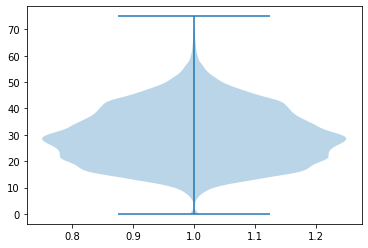

In [ ]:
ksc_mappings_df = getCustomKSCMappingsEdit()


In [ ]:
TestWithCluster = createTestWithCluster(ksc_mappings_df)

Total Data   7014
Total Data having cluster information is  7014
Test data with cluster information 1661


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
label_name = 'KSCText'
merged_test_train_data=preProcessDeepLearning(test_with_cluster,test_with_cluster,label_name)

# pass the chapter which you want as label in you data 
# it gives the merged train and test data with appropiate column nanmes 
uniq_label_list = merged_test_train_data['label'].unique().tolist()
no_labels = len(uniq_label_list)
merged_test_train_data['label_code'] = [uniq_label_list.index(label) for label in merged_test_train_data['label'].tolist()] 

corpus=  merged_test_train_data 
corpus['label'] = corpus['label_code']
corpus.drop('label_code',axis= 1, inplace = True)
print('No of unique',label_name, 'are',no_labels)

## Do pre processing 

# Separate the sentences and the labels
# Separate the sentences and the labels for training and testing

test_x = list(corpus[corpus.split=='test'].sentence)
test_y = np.array(corpus[corpus.split=='test'].label)

test_x  = preProcess(test_x)
test_x= test_x[0 : round(len(test_x)/2)]

Xtest = tokenizer_total.texts_to_matrix(test_x, mode='freq')

trial_data = test_with_cluster

# defining KSC similarity array to get similarity between KSCs using different metrics 
total_KSC = len(KSC_mapping_total)
KSC_sim_array = np.zeros((total_KSC,total_KSC), dtype=int, order='C') # smilarity between KSC based on misclassifications
total_KSC_list = KSC_mapping_total.label.tolist()


No of unique KSCText are 382


In [ ]:
def createTestWithCluster(ksc_mappings_df):
  total_data_cluster= total_data[total_data['KSCText'].isin(ksc_mappings_df.KSCText.tolist())]
  print('Total Data  ', len(total_data))
  print('Total Data having cluster information is ', len(total_data_cluster))


  test_with_cluster = total_data_cluster[total_data_cluster.UseAs == 'Trial']
  ksc_text = test_with_cluster['KSCText']
  ksc_cluster_column= [ksc_mappings_df[ksc_mappings_df['KSCText']==ks].KSCClusterName.tolist()[0] for ks in ksc_text]
  print('Test data with cluster information', len(test_with_cluster))


  test_with_cluster['KSCClusterName']= ksc_cluster_column
  test_with_cluster.to_csv('test_with_cluster.csv')
  return test_with_cluster

In [ ]:
pred_seq_wise_text = accuracyTopThreeKSCText()
print('Accuracy with top 3 KSC when matching with text is',sum(pred_seq_wise_text)/len(pred_seq_wise_text) * 100)


Accuracy with top 3 KSC when matching with text is 66.38554216867469


In [ ]:
pred_seq_wise_cluster = accuracyTopThreeKSCClsuter(test_with_cluster)
print('Accuracy with top 3 KSC when matching with cluster is',sum(pred_seq_wise_cluster)/len(pred_seq_wise_cluster) * 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Accuracy with top 3 KSC when matching with cluster is 67.10843373493975


In [ ]:
np.amax(KSC_sim_array,axis =0 )
np.argmax(KSC_sim_array,axis =0 )
KSC_sim_array[4,65]
print(total_KSC_list[4])
print(total_KSC_list[65])

Endocrine Glands and their Roles - 1
Endocrine Glands and Their Roles - 2


### We are getting arounud 75 accuracy when comparing to the top 3 KSC cluster 